In [1]:
from __future__ import unicode_literals, print_function, division

# Common imports
import numpy as np
import os
import pandas as pd

# To make this notebook's output stable across runsD
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
# Default pyplot settings
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save figures:
PROJECT_ROOT_DIR = "." # current directory
CHAPTER_ID = "training_linear_models"

def save_fig(fig_id, tight_layout = True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", 
                        CHAPTER_ID, fig_id+".png")
    print("Saving figure: ", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format = "png", dpi = 300)

- Why understand how things work? 
    - right algo to use
    - hyperparameter tuning

- There are two ways to train a Linear Regression Model: 
    - Use a direct "closed-form" equation that directly computes the model parameters that best fit the training set (i.e, the model parameters that minimize the cost function over the training set) 
    - Using an iterative optimization approach, called Gradient Descent, that graudally tweak the model parameters to minimize the cost function over the training set. Eventually, it converges to the set of parameters as the first method. 

- There are different methods for implementing Gradient Descent: 
    - Batch GD 
    - Mini-batch GD 
    - Stochastic GD

- Polynomial Linear Regression: 
    - more complex model, that can fit non-linear datasets. 
    - has more parameters than linear regression.
    - is prone to overfitting the training data. 
        - This can be detected through learning curves. 
        - and can be cured by using several regularization techniques to reduce the risk of overfitting the training set. 
- Classification Models: 
    - Logistic Regression
    - Softmax Regression

## Linear Regression Model Prediction: 

# $\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n $

where:
- ### $\hat{y} $ is the predicted value
- ### $n$ is the number of features. 
- ### $x_i$ is the $i^{th}$ feature value. 
- ### $\theta_{j}$ is the $j^{th}$ model parameter (including the bias term $\theta_0$ anf the feature weights $ \theta_1, \theta_2, \theta_n $.  
    - This remains constant for each instance in the training set.   
    - [Why do we have a bias term](https://www.quora.com/Why-do-we-need-the-bias-term-in-ML-algorithms-such-as-linear-regression-and-neural-networks)? 
        - In linear regression, without the bias term your solution has to go through the origin 
        - That is, if yall your features are equal to 0, your predicted value wouldf also have to be zero. 
        - However, this may not be the answer your training data/real world suggests. 
        - For eg: If we has 0 for all the features in the `housing dataset`, does not mean the house's value is 0. It will be something, atleast. 
        - Adding a bias weight that does not depend on any of the features allows the hyperplane described by your learned weights to more easily fit the data thatndoes not pass through the origin. 
    
**Equation 4-2: Linear Regression model prediction (vectorized form)**

# $
\hat{y} = h_{\mathbf{\theta}}(\mathbf{x}) = \mathbf{\theta}^T \cdot \mathbf{x}
$

where: 
- ### $ \theta $ is the model's column _parameter vector_ containing the bias term $\theta_0$ and the feature weights $ \theta_1, \theta_2, \theta_n $.  
- ### $\theta^T$ is the transpose of the weight vector ( a row vector, instead of a column vector). 
- ### $\mathbf{x} $ is the instace's column _feature vector_, containg all features, from $x_0 = 1$ for $\theta_0$ upto $x_n$. 
- ### $\mathbf{\theta}^T \cdot \mathbf{x}$ is the dot product/matrix multiplication of $\theta^T$(row vector [$1 \times n+1$]) and $\mathbf{x} $(colum vector [$n+1 \times 1$])
- ### So, in other words, the transpose of our parameter vector * an input example $\mathbf{x} $ gives you a predicted __hypothesis__ which is [1 x 1] dimensions (i.e. a single value)
- ### $ h_{\mathbf{\theta}}(\mathbf{x})$ is the hypothesis function, using the model parameters $\theta$. 

DOUBT: Is __x__ a column vector? Yes.   
DOUBT: Where does the bias term come from? I know its got something to do with shifting the threshold to the other side of the equation. See that udacity video. 




- __Ok, so now how do we train the Linear Regression model?__
   - Training a model always means to set its parameters such that it causes the least error finding the best line of fit (in this case). 
   - The error will be measured by MSE: 

       -  **Equation 4-3: MSE cost function for a Linear Regression model**
       - ## $\text{MSE}(\mathbf{X}, h_{\mathbf{\theta}}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{(\mathbf{\theta}^T \cdot \mathbf{x}^{(i)} - y^{(i)})^2}$
            - ### This is a mean of all the squared errors (from each instance). 
            - ### m is the number instance in the dataset.
            - ### $x^i$ is a column vector of all the feature values (excluding the label) of the $i^th$ instance in the dataset, and 
            - ### $y^i$ is its' label ( the desired output value ) 
            - ### $ (\mathbf{\theta}^T \cdot\mathbf{x}^{(i)})$ is the predicted value.
            
            

# The Normal Equation: 

- To find the value of $\theta$ that minimises the cost function / mean squared error, there is a _closed form solution_. 
- In other words, a mathematical gives the result directly. 

# $ \hat{\theta} = (X^T\cdot X)^{-1}\cdot X^T\cdot y$
- $\hat{\theta}$ is the vector of parameters that minimises the cost function. 
- __y__ is the vector of target values containing labels for each instance. From __$y^1$__ to __$y^m$__.  

In [2]:
X = 2*np.random.rand(100,1)
X[:10]
# Returns an array with random numbers, shape of the array
# is (100,1)

array([[ 0.74908024],
       [ 1.90142861],
       [ 1.46398788],
       [ 1.19731697],
       [ 0.31203728],
       [ 0.31198904],
       [ 0.11616722],
       [ 1.73235229],
       [ 1.20223002],
       [ 1.41614516]])

In [3]:
y = 4 + 3*X + np.random.randn(100,1)
y[:10]
# Returns a target array of shape (100,1)

array([[ 6.33428778],
       [ 9.40527849],
       [ 8.48372443],
       [ 5.60438199],
       [ 4.71643995],
       [ 5.29307969],
       [ 5.82639572],
       [ 8.67878666],
       [ 6.79819647],
       [ 7.74667842]])

- Before using the Normal Equation to find parameters, that fit `X` , to get `y`: , first we need to add the column of 1s or column $x_0$ to the the training data.

In [4]:
x_0 = np.ones((100,1))
x_0[:10]

array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.]])

In [5]:
# Merging the training data and x_0 column: 
X_b = np.c_[x_0, X]# add x_0 = 1 for each instance, not in 
# place operation
X_b[:10] # feature matrix


array([[ 1.        ,  0.74908024],
       [ 1.        ,  1.90142861],
       [ 1.        ,  1.46398788],
       [ 1.        ,  1.19731697],
       [ 1.        ,  0.31203728],
       [ 1.        ,  0.31198904],
       [ 1.        ,  0.11616722],
       [ 1.        ,  1.73235229],
       [ 1.        ,  1.20223002],
       [ 1.        ,  1.41614516]])

#### Using the formula for the normal equation to find parameters, that fit `X` , to get `y`: 
# $ \hat{\theta} = (X^T\cdot X)^{-1}\cdot X^T\cdot y$ 


In [6]:
best_theta = np.linalg.inv(np.dot(X_b.T, X_b)).dot(X_b.T).dot(y)
best_theta

array([[ 4.21509616],
       [ 2.77011339]])

- The actual function we used to generate the data is:
    - `y` = 4 + 3`X` + `Gaussian Noise`
    - The parameters found are close enough
    - $\theta_0$ = 3.91, close to 4.
    - $\theta_1$ = 3.16, close to 3. 
    - The Gaussian noise made it impossible to recover the exact parameters of the original function. 
    - But we did come close enough. 
    
- Now, lets create our prediction vector or $\hat{y}$. 

In [7]:
y_pred = X_b.dot(best_theta)
y_pred.shape

(100, 1)

- Let's check the mean squared error on this. 
    - But before that, make sure the dimensions of both `y` and `y_pred` are equal. 
    

In [8]:
y.shape == y_pred.shape

True

In [9]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y,y_pred)

0.80658456396705314

- ### Lets plot the Model's Predictions / Best line of fit
    - Finding the max, min points for x,y axis: 

In [10]:
np.ceil([X_b.min(), X_b.max(), y_pred.min(), y_pred.max()])

array([  1.,   2.,   5.,  10.])

[0, 2, 0, 15]

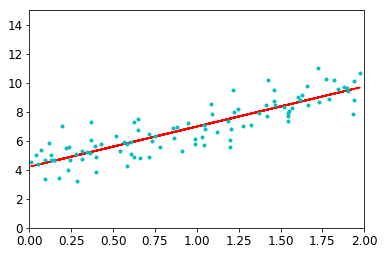

In [11]:
plt.plot(X, y_pred, "r-")
# Not using X_b for plotting, it includes the 1s
plt.plot(X, y, "c.")
plt.axis([0 , 2, 0, 15])

The equivalent code, using sklearn looks like this, using the[__`sklearn.linear_model.LinearRegression()`__](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [12]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
# >> Creating the estimator

lin_reg.fit(X,y)
# >> Fitting the training set and its labels to the 
# model. This will now calculate it's parameters. 

lin_reg.intercept_,lin_reg.coef_ # interpcept, slope
#   \theta_0      , \ theta_1

(array([ 4.21509616]), array([[ 2.77011339]]))

In [13]:
X_new = np.array([
    [0],
    [2]
])
lin_reg.predict(X_new)

array([[ 4.21509616],
       [ 9.75532293]])

## Computational Complexity of the Normal Equation: 
- The Normal Equation computers the inverse of $X^T\cdot{X}$, which is an $m \times n$ matrix, where n is the number of features. 
- The computational complexity of inverting a matrix is typically about $O(n^{2.4}$ to $O(n^{3})$ (depending on the implementation). 
- DOUBT: In other words, if you double the number of features you multiply the computation time by roughly $(2^{2.4}) = 5.3 $ to $(2^{3}) = 8$.
- Each time you double the ammount of features, you increase the computational time roughly 5 to 8 times than it orginal is. 
    - So if 1 features, takes 1 second.
    - 2 features will take 5 to 8 seconds.
    - 3 features will take 25 - 60 seconds. 
    - 4 features will take 125 - 480 seconds. 
- The Normal Equation gets very slow when the number of features grows large (eg: 100,000). 
- On the positive side, the equation is __linear with regard to the number of instances__ in the training set (it is $O(m)$, so it handles large training sets efficiently provided they can fit in memory. 
    - In other words, training twice as many instances will take twice as much time. 
- Once you have trained Linear Regression model (using the Normal Eqaution / any other algorithm ), predictions are very fast. The computational complexity is linear with regards to:
    - The number of instances you want to make predictions on. 
    - The number of features. 
    - That is, making predictions on twice as many instances will take twice as much time. 
    - Making predictions using twise as many features will take twice as much time. 

# Gradient Descent: 
- _Gradient Descent_  is used for training Linear Regresision models which have:
    - high number of features
    - high number of instances
- It tweak parameters iteratively in order to minimise the cost function. 
- Gradient Descent measures the local gradient/slope of the error function with regards to the parameter vector $ \theta $, and it goes in the direction of the descentding gradient. 
- Once the gradeint is 0, you have reached a minimum! 
- Concretely: 
    - You start by _random initialization_, i.e filling the parameter vector $\theta$ with random values. 
    - Then, you start taking small baby steps at a time, each step decreases the cost function (eg: MSE), until the algorithm _converges_ to a minimum. 
- The size of the step is determined by $\eta$ or the _learning rate_ hyperparameter. 
    - If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long, long time. 
    - On the other hand, if the learning rate is set too high, you might jump across the minimum point of the cost function, ending up at a larger value of the cost function than before. 
- Finally, not all cost function look like nice regular bowls. There may be holes (dicontinuities), ridges (pointy peaks) , plateaus, and all sort of irregular terrains, making convergence to the minimum very difficult. 
    - In such case, $ \theta $ might get stuck in a _local minima_, which is not as good as the _global minima_. 
    - Fortunately, the MSE cost function for Linear Regression is a model that happens to be a _convex function_, always. 
        - This means that if you pick any two points on the curve, the line segment joining them never cuts/crosses the curve. 
        - This implies that there is no _local minima_, just one _global minima_.
        - It is also a continuous function (no holes), with a slope that never changes abruptly. 
        - This means that given a small enough learning rate, Gradient Descent guarantees to approach arbitrarily close to global minimum. 
- The cost function has the shape of a bowl (contour plot). It can be a very elongated bowl if the features have very different scales. 
    - If we do not scale the features, gradeint descent take a lot of time to converge to global minimum. 
    - This is because the gradients will be small in an elongated bowl. 
    - It will too eventually reach the minimum, but it will take a long, long time. 
    '- This is why you should use `sklearn.preprocessing.StandardScaler()` class. 
- The cost function also illustrates the fact that training a model means searching for a combination of model parameters that minimizes the cost function (over the training set). 
    - It is a search in the model's _parameter space_ : The more th parameters a model has, the more dimensions in this space, and the harder the search is. 
    - Searching for a needle in a 300 dimensional haystack is much trickier than in three dimensions. 
    - Fortunately, since the cost function is convex in the case of Linear REgression, the needle is simply at the bottom of the bowl.   
    
__DOUBT__ : I can visualise searching for global minima of the vector $\theta$ when the number of parameters is 1, and when the number of parameters are two.    
For obvius reasons, i cannot visualise searching fro gloabl minima vector $\theta$ when the number of parameters are greater than 2. Should i just assume that the way it works in 2D and 3D space, it will generalise to higher dimensions? 
Secondly, how does a computer visualise in 300 dimensions or a million dimensions , when we cannot? 


##  Batch Gradeint Descent: 

- To implement _Gradeint Descent_,  you need to compute the gradient of the cost function with regards to each model parameter $\theta_j$. 
- In other words, you need to calculate how much the cost function will change if you change $\theta_j$ just a little bit. 
- This is called a _partial derivative_. 
- It is like asking "What is the slope of the mountain under my feet if i face east?" and then asking the same question facing north ( and so on for all other dimensions, if you can imagine a universe with more than 1 dimension.

**Equation 4-5: Partial derivatives of the cost function with respect to parameter $\theta_j$: **

## $\dfrac{\partial}{\partial \theta_j} \text{MSE}(\mathbf{\theta}) = \dfrac{2}{m}\sum\limits_{i=1}^{m}(\mathbf{\theta}^T \cdot \mathbf{x}^{(i)} - y^{(i)})\, x_j^{(i)}$

### $\dfrac{2}{m}(\mathbf{\theta}^T \cdot \mathbf{x}^{(i)} - y^{(i)})\, x_j^{(i)}$ is the partial  derivative of the cost function for one instance / training example. 
- where m is the number of training examples.
- $(\mathbf{\theta}^T \cdot \mathbf{x}^{(i)}$ is the prediction for the instance. 
- $y^{(i)}$ is the target label of the instance. 
- $x_j^{(i)}$ is the feature of the $j^{th}$ parameter $\theta_j$.  

- Now, instead of computing these partial derivatives for each instance individually, you can use the following equation to compute all of them in one go. 


**Equation 4-6: Gradient vector of the cost function**

## $\nabla_{\mathbf{\theta}}\, \text{MSE}(\mathbf{\theta}) =
\begin{pmatrix}
 \frac{\partial}{\partial \theta_0} \text{MSE}(\mathbf{\theta}) \\
 \frac{\partial}{\partial \theta_1} \text{MSE}(\mathbf{\theta}) \\
 \vdots \\
 \frac{\partial}{\partial \theta_n} \text{MSE}(\mathbf{\theta})
\end{pmatrix}$

## $ = \dfrac{2}{m} \mathbf{X}^T \cdot (\mathbf{X} \cdot \mathbf{\theta} - \mathbf{y})$
- where m is the number of training examples. 
- $\mathbf{X}^T$ is the transpose of the feature matrix.
    - # In the code: 
    - Now, $\theta$ is a __row vector__ ($ 1 \times n + 1$). 
    - Now, $\theta^T$ is a __column vector__ ($ n + 1 \times 1)$). 
    - $x_i$ is a __column_vector__ (($ n+1 \times 1$))
    -  __`X_b`__ is a (($ m \times n + 1$)) matrix, where each row refers to 1 instance's features. 
    - Therefore, __X_b$^T$__ is a (($ n + 1 \times m$))matrix. 
    - $\mathbf{X} \cdot \mathbf{\theta}$ refers to __X__ (($ m \times n+1 $)) matrix's multiplication with a ($ 1 +  \times (n+1) $), __which does not match__. 
    - Although,  $\mathbf{X} \cdot \mathbf{\theta^T}$ refers to __X__ (($ m \times n+1 $)) matrix's multiplication with a ($ (n +1)  \times 1 $), __which does match__. 
    - According to me the correct order should be: 
    ## $ = \dfrac{2}{m}  (\mathbf{\theta}^T \cdot \mathbf{X} - \mathbf{y})\mathbf{X}^T $
    -  $(\mathbf{\theta}^T \cdot \mathbf{X} - \mathbf{y})$ will give a $1 \times m$ array cause, parameter vector is  $ 1 \times (n+1) $ and __X__ is a $(n+1) \times m$ array.
    - The last order will be multiplication of a $1 \times m$ array and a (($ m \times n + 1$)), leaving a $ 1 \times (n+1)$ array, which is the same order as the parameter vector. 

- Notice that this formula involves calculation for the full training set X, at each Gradeint Descent Step! 
- This is why the algorith is called _Batch Gradient Descent_: It uses the whole batch of training data at every step. 
- As a result, _BGD_ is terribly slow on large training sets. 
- However, Gradient Descent scales well with the number of  features. 
- Training a Linear Regression model when there are hundred and thousands of features is much faster using Gradient Descent than using Normal Equation. 
- Now, once we have the gradient vector, we will subtract it from the orginal $\theta$ vector, as we always need to move in the opposite side of the gradient. 
- We will first multiply the gradient vector by $\eta$ to determine both the size and direction of the downhill step.  

**Equation 4-7: Gradient Descent step**

# $
\mathbf{\theta}^{(\text{next step})} = \mathbf{\theta} - \eta \nabla_{\mathbf{\theta}}\, \text{MSE}(\mathbf{\theta})
$

In [14]:
# Hyperparameters: 
eta = 0.1 # learning rate
n_iterations = 1000 

# Used in formula 
m = 100

# random initalisation of theta transpose vector  
theta = np.random.randn(1,2) # n+1 x 1 array , where n = 1
theta

array([[ 0.01300189,  1.45353408]])


## Batch Gradient Descent Formula:  $  \dfrac{2}{m} \mathbf{X}^T \cdot (\mathbf{X} \cdot \mathbf{\theta^T} - \mathbf{y})$
- # In the code: 
    - Now, $\theta$ is a __row vector__ ($ 1 \times n + 1$). 

In [15]:
theta.shape # 1×n+1, n = 1

(1, 2)

- Now, $\theta^T$ is a __column vector__ ($ n + 1 \times 1)$). 

In [16]:
theta.T.shape, # n + 1 x 1, n =1 

((2, 1),)

- $x_i$ is a __row_vector__ (($ 1 \times (n+1)$))

In [17]:
X_b[0].shape # ( n+1×1) where n = 1

(2,)

 -  __`X_b`__ is a (($ m \times n + 1$)) matrix, where each row refers to 1 instance's features. 

In [18]:
X_b.shape # m X n+1 array , where n = 1, m = 100

(100, 2)

$\mathbf{X} \cdot \mathbf{\theta}^T$ will be a $m \times 1$ __column__ matrix.  

In [19]:
X_b.dot(theta.T).shape

(100, 1)

As y needs to be subtracted from $\mathbf{X} \cdot \mathbf{\theta}$ , it needs to be of the same order as it.

In [20]:
y.shape

(100, 1)

In [21]:
param_vec = theta.T
param_vec

array([[ 0.01300189],
       [ 1.45353408]])

In [22]:
for iteration in range(n_iterations):
    gradient_vec = 2/m * X_b.T.dot(X_b.dot(param_vec) - y)
    param_vec = param_vec - eta*gradient_vec

In [23]:
param_vec

array([[ 4.21509616],
       [ 2.77011339]])

Let me try my formula: 


## $ = \dfrac{2}{m}  (\mathbf{\theta}^T \cdot \mathbf{X} - \mathbf{y})\mathbf{X}^T $

In [24]:
X_b.shape

(100, 2)

This formula cannot work. We will need __X__ to be as 2 X 100 array. As theta cannot be a 100 by n array.

Supposing we take the transpose of X. 

In [25]:
new_X_b = X_b.T
new_X_b.shape

(2, 100)

Now, that X is a $n + 1 \times m$ array. 
$ \theta ^T $ has to be a $ 1 \times n+1 $ array. 

In [26]:
theta_new = np.random.randn(2,1)
param_vec_new = theta_new.T
param_vec_new

array([[-0.26465683,  2.72016917]])

In [27]:
param_vec_new.shape

(1, 2)

Lets check the order of the dot product theta tanspose X. 

In [28]:
param_vec_new.dot(new_X_b).shape

(1, 100)

In [29]:
y.shape

(100, 1)

For this formula to work, y needs to be a row vector, not a column vector. 

In [30]:
y_new = y.reshape(1,100)
y_new.shape

(1, 100)

# $ (\mathbf{\theta}^T \cdot \mathbf{X} - \mathbf{y})$'s shape: 

In [31]:
(param_vec_new.dot(new_X_b) - y_new).shape

(1, 100)

# $ (\mathbf{\theta}^T \cdot \mathbf{X} - \mathbf{y})\mathbf{X}^T$ 's shape needs to be same as param_vec's shape, i.e (1,2)

In [32]:
(param_vec_new.dot(new_X_b) - y_new).dot(new_X_b.T).shape

(1, 2)

So, supposedly the linear algebra does work out. 
Lets' try this formula. 

In [33]:
for iteration in range(n_iterations):
    gradient_vec_new = 2/m * (param_vec_new.dot(new_X_b) - y_new).dot(new_X_b.T)    
    param_vec_new = param_vec_new - eta*gradient_vec_new

In [34]:
param_vec_new

array([[ 4.21509616,  2.77011339]])

# Therefore, both formulas: 
- # $\dfrac{2}{m} \mathbf{X}^T \cdot (\mathbf{X} \cdot \mathbf{\theta^T} - \mathbf{y})$
    
# and
# $ = \dfrac{2}{m}  (\mathbf{\theta}^T \cdot \mathbf{X} - \mathbf{y})\mathbf{X}^T $
# work. 
- Each just has a different ordering in X_b, y, theta.
    - Formula 1 has X_b (m x n+1) matrix, where each row refers to 1 instance. 
    - Formula 2 has new_X_b (n+1 x m) matrix, where each column refers to 1 instance. 
    - Formula 1 has y (m x 1) __column__ matrix, where each row refers to 1 target label. 
    - Formula 2 has y (1 x m) __row__ matrix, where each column has 1 target label. 
    - Formula 1 has theta.T (n+1 x 1) __column__ matrix, where each row  has 1 weight/parameter. 
    - Formula 2 has theta.T (1 x n+1) __row__ matrix, where each column has 1 weight/parameter. 

In [35]:
# Originals: Used in Books Formula
X_b.shape, y.shape, param_vec.shape

((100, 2), (100, 1), (2, 1))

In [36]:
# Used with my formula: 
new_X_b.shape , y_new.shape , param_vec_new.shape

((2, 100), (1, 100), (1, 2))

- __We saw that Gradient Descent and Normal Equation, find the same answer__. 

In [37]:
X.shape

(100, 1)

In [38]:
new_X = X.reshape(1,100)
new_y = y_new.copy()
new_param_vec = param_vec_new.copy()

### It does not matter whether you use the first formula, or the second. 
### Notice, the predictions are also the same, just my preffered formula 2 outputs a row matrix, and the book's formula outputs a column matrix. 

In [39]:
pd.DataFrame(param_vec_new.dot(new_X_b)).head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,6.290133,9.482269,8.270509,7.5318,5.079475,5.079341,4.536893,9.013908,7.54541,8.137979,...,4.877675,8.166634,8.430018,7.324699,8.486429,6.950836,7.111155,6.58377,4.355924,4.812839


In [40]:
pd.DataFrame(X_b.dot(param_vec)).head()

,0
0,6.290133
1,9.482269
2,8.270509
3,7.531800
4,5.079475


# This is happening cause of the formula: 

# $ (A*B)^T  = B^T*A^T $
- Here: A = `X_b`, and B = `param_vec`
- and $A^T$ = `new_X_b` and $B^T$ = `new_param_vec` 


# Going back to code block 25: 

In [41]:
X.shape, param_vec.shape, X_b.shape

((100, 1), (2, 1), (100, 2))

Saving figure:  gradient_descent_plot


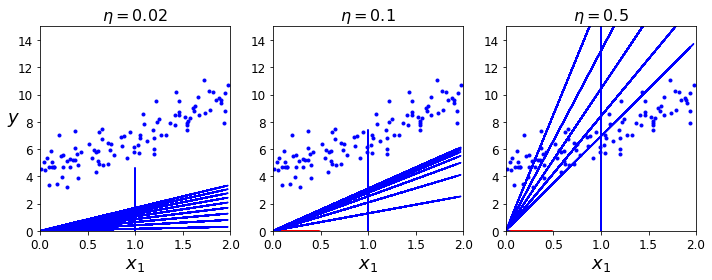

In [42]:
param_vec_path_bgd = []

def plot_gradient_descent(param_vec, eta, param_vec_path = None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X.dot(param_vec.T)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_b, y_predict, style)
        gradients = 2/m * X.T.dot(X_b.dot(param_vec) - y)
        param_vec = param_vec - eta * gradients
        if param_vec_path is not None:
            param_vec_path.append(param_vec)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
param_vec = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(param_vec, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(param_vec, eta=0.1, param_vec_path=param_vec_path_bgd)
plt.subplot(133); plot_gradient_descent(param_vec, eta=0.5)

save_fig("gradient_descent_plot")
plt.show()

In [43]:
param_vec_path_bgd

[array([[ 1.91425658],
        [ 1.27927812]]), array([[ 2.71513941],
        [ 2.08016095]]), array([[ 3.16762203],
        [ 2.53264357]]), array([[ 3.42326557],
        [ 2.78828711]]), array([[ 3.567699  ],
        [ 2.93272055]]), array([[ 3.64930097],
        [ 3.01432252]]), array([[ 3.69540444],
        [ 3.06042599]]), array([[ 3.72145197],
        [ 3.08647351]]), array([[ 3.73616829],
        [ 3.10118984]]), array([[ 3.74448272],
        [ 3.10950427]]), array([[ 3.7491802 ],
        [ 3.11420175]]), array([[ 3.75183419],
        [ 3.11685573]]), array([[ 3.75333363],
        [ 3.11835518]]), array([[ 3.75418079],
        [ 3.11920234]]), array([[ 3.75465942],
        [ 3.11968096]]), array([[ 3.75492983],
        [ 3.11995138]]), array([[ 3.75508261],
        [ 3.12010416]]), array([[ 3.75516893],
        [ 3.12019047]]), array([[ 3.7552177 ],
        [ 3.12023924]]), array([[ 3.75524525],
        [ 3.12026679]]), array([[ 3.75526081],
        [ 3.12028236]]), array([[ 3.7

- ### Stochastic Gradient Descent: 
    - The main problem with batch gradeint descent is the fact that it uses the whole training set to compute the gradients ar every step, which makes it very slow when the training set it large. 
     - At the opposite extre, _Stochastic Gradient Descent_ just picks random instacne in the training set at every step and computers the gradients based only on that single instance. 
     - **Cost function for one instance:**
     - ## ${(\mathbf{\theta}^T \cdot \mathbf{x}^{(i)} - y^{(i)})^2}$
     - **Equation 4-5: Partial derivatives of the cost function with respect to parameter, for one instance only:  $\theta_j$: **
     - ## $\dfrac{\partial}{\partial \theta_j} \text{MSE}(\mathbf{\theta}) =2(\mathbf{\theta}^T \cdot \mathbf{x}^{(i)} - y^{(i)})\, x_j^{(i)}$
    - It also makes it possible to train on huge training sets, since only one instance needs to be in memory at each iteration (SGD can be implemented as an online/out-of-core algorith). 
    - On the other hand, Stochastic Gradient Descent is much less regular than Batch Gradient Descent. 
    - Instead of gently decreasing until it reached the minimum, the cost function will bound up and down, decreasing only on average. 
    - Over time, it will end up very close to the minimum, but once it get there, it will continue to bounce around. Never settling down. 
    - So, once the algorithms stops, the final parameters values are good, but not optimal.
    - When the cost function is very irregular ( non-convex), this can actually help the algorithm jump out of local minima, so Stochastic Gradient Descent has a better chance of finding the global minimum than the Batch  Gradient Descent does. 
    - Because, at each iteration, it will be using a different instance , leading to a different cost function, which leads to a different gradient. 
    - Therefore, the rabndomness is a good escape from the local optima but bad because it means that the algorithm can never settle at the minimum. 
    - Solution:
         - _simulated annealing_ : Gradually decrease the learning rate. The steps stard out large ( allowing quick progress and skipping over local optima ), then get smaller once we're close to the global minima. 
         - It is called _simulated annealing_ because it resembeles the process of slowly cooling down the metal after heating it. 
         - If the learning rate is reduced too quickly, you may get stuck in local minimum, or even end up frozen halfway to the local minimum. 
         - If the learning rate is reduced verys lowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early. 
         
     
    

In [44]:
X_b[2]
# >> array([ 1.        ,  1.46398788])
X_b.shape
# >> (2,) 
X_b[2:3]
# >> array([[ 1.        ,  1.46398788]])
X_b[2:3].shape 
# >> (1,2) Row Vector 



y[2]
# >> array([ 8.48372443])
y[2].shape
# >> (1,)
y[2:3]
# >> array([[ 8.48372443]])
y[2:3].shape
# >> (1,1)


param_vec.shape
# >> (2,1)

(2, 1)

- So, what this code does: 
    - for each epoch, it goes through `m` training examples ( gradient descent iteration).
        - For each iteration, it takes a radom number between `0` and `m`.
        - indexes the (1,2) __row vector__ `x_i` from the training set. 
        - indexes `x_i`'s corresponding (1,1) label. 
        - Finds the gradient of the cost function for one training example: 
             - **Cost function for one instance:**
             - ### ${(\mathbf{\theta}^T \cdot\mathbf{x}^{(i)} - y^{(i)})^2}$
             - **Equation 4-5: Partial derivatives of the cost function with respect to parameter, for one instance only:  $\theta_j$: **
             - ### $\dfrac{\partial}{\partial \theta_j} \text{MSE}(\mathbf{\theta}) =2(\mathbf{\theta}^T \cdot \mathbf{x}^{(i)} - y^{(i)})\, x_j^{(i)}$
             - ##### Explanation of Gradient Code:    
             - The `param_vec` is a `(2,1)` array. 
            The `x_i` is a `(1,2)` array. 
            I need to multiply them to get a (`1,1`) array that is able to be subtracted from `y`. 
            Therefore, it has to `x_i.dot(param_vec)`
            Though the formula say `param_vec.x_i`, i'm doing the opposite, which is fine cause of the property: 
            # $ (A*B)^T  = B^T*A^T $
            - [(1,2)$*$(2,1)].T = (2,1).T $*$ (1,2).T
            - (1,1).T = (1,2 $*$ 2,1)
            - (1,1) = (1,1) 

            Next, we will multiply this scalar __error__ value with the input vector (x_i)'s transpose. 
            - x_i.T.dot((1,1))
            - (1,2).T.dot((1,1))
            - 2,1 $*$ (1,1) 
            - (2,1), which is exactly the shape of `param_vec` or $\theta^T$ 
        - Once we have the partial derivate/gradient of the cost function with respect to each weight , i.e the gradient vector, `gradient (2,1)`.
        - We use the learning rate to update the `param_vec`.  
        
    - Once it's done with `m` training examples, it starts the next epoch. 
- The line plots in the green shows the `predictions` after certain epoch intervals (0, 10, 20, 30, 40, 50). 
- The line plots in blue show how much the parameters jump up and down, making fluctuating predictions when going through random training examples. 

Plotting line of best usin fluctuating parameters.  
Plotting line of best usin fluctuating parameters.  
Plotting line of best usin fluctuating parameters.  
Plotting line of best usin fluctuating parameters.  
Plotting line of best usin fluctuating parameters.  
Plotting line of best fit after  0  epochs
Plotting line of best fit after  10  epochs
Plotting line of best fit after  20  epochs
Plotting line of best fit after  30  epochs
Plotting line of best fit after  40  epochs


[0, 2, 0, 15]

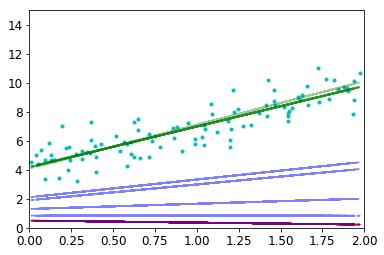

In [45]:
param_vec_path_sgd = []

m = len(X_b)
np.random.seed(42)
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters


def learning_schedule(t):
    """
    Highest Learning Rate: 5/(50 + 0*100 + i) = 0.1
    Lowest Learning Rate: 5/(50 + 50*100 + i)
                         ~5/5050 = 0.0001
    """
    return t0/(t+t1)

# Random Intialization of parameters: 
theta = np.random.randn(1,2) # n+1 x 1 array , where n = 1
param_vec = theta.T

plt.plot(X,y, "c.")
plt.plot(X, X_b.dot(param_vec), "r-")
for epoch in range(n_epochs): # 50
    for i in range(m): # m is the number of training examples 
        if epoch == 0 and i < 5: 
            y_prediction = X_b.dot(param_vec)
            print("Plotting line of best usin", 
                  "fluctuating parameters.  ")
            plt.plot(X, y_prediction, "b--", alpha = 0.5)
            
        random_index = np.random.randint(m)
        x_i = X_b[random_index:random_index+1]
        # >> We don't use `X_b[random_index]` as we want
        # a 2D __row vector__. See previous code block. 
        
        y_i = y[random_index:random_index+1]
        # >> Same reason, we want a 2D (1,1) scalar value. 
        
        gradients = x_i.T.dot(x_i.dot(param_vec) - y_i)
        eta = learning_schedule(epoch * m + i)
        # >> As epoch keeps on increasing, `epoch * m + i`
        # will keep on increasing, therefore 
        # `t0` will be divided by  a larger and larger number
        # every time, making the learning rate, gradually slow. 
        
        param_vec = param_vec - eta * gradients
        param_vec_path_sgd.append(param_vec)
    if epoch == 0  or (epoch % 10 == 0 and epoch > 9):  
        y_prediction = X_b.dot(param_vec)
        print("Plotting line of best fit after ", epoch, 
              " epochs")
        plt.plot(X, y_prediction, "g--", alpha = 0.4)
        
        
plt.axis([0, 2, 0, 15])  

In [46]:
param_vec

array([[ 4.20187027],
       [ 2.76970691]])

In [47]:
X.shape, y.shape

((100, 1), (100, 1))

- The line plots in the green shows the `predictions` after certain epoch intervals (0, 10, 20, 30, 40, 50). 
- The line plots in blue show how much the parameters jump up and down, making fluctuating predictions when going through random training examples. 

- Now, to perform Linear Regression using SGD with Scikit-Learn, you can use [__`SGDRegressor`__](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor.fit) class, which defaults to optimizing the `squared error cost function`. 
- Now, the following code:
    - Does 50 epochs/ `n_iter`
    - starting at a learning rate of 0.1 (`eta0` = 0.1), using the default learning schedule (different from the hard coded one above)
    - It does not use any regualrization (`penalty = None`)
    - Notice how `sgd_red` only takes in a 2D array of the inputs `X` with shape `(n_samples, n_features)` and a 1D array of target labels `y` with shape `(n_samples,)`. 
    - This is why we have to perform the ravel function on the as `y` is the same order as `X`, i.e `(100,1)`, where `n_samples` = 100, and `n_features` = 1. 

In [48]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter = 50, 
                       penalty = None,
                       eta0 = 0.1)
sgd_reg.fit(X,y.ravel())

SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.1,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=50, penalty=None, power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

Oncem again, you find the solution that is very close to the one found by the Normal Equation, which is: 

In [49]:
best_theta

array([[ 4.21509616],
       [ 2.77011339]])

and the parameters found by `sgd_reg` are: 

In [50]:
sgd_reg.intercept_ , sgd_reg.coef_

(array([ 4.23166744]), array([ 2.79099659]))

DOUBT: Untill now, i've only done linear regression where there are 2 parameters, $\theta_0$ and $\theta_1$. 
- [What about linear regression with multiple parameters](https://www.youtube.com/watch?v=JTj-WgWLKFM)? 

## Mini-Batch Gradient Descent: 

- The last Gradient Descent algorithm we will look at is called the _Mini Batch Gradient Descent_. 
- At each step, instead of computing the gradients based on the _full training set_ (as in Batch GD) or based on just one instace (as in Stochastic GD), Mini-BAtch GD computes the gradients on small random sets of instances called _mini-batches_. 
- The main advantage of a _mini batch_ GD over Stochastic GD is that you can get a performance boost from hardware optimization of matrix operations, especially when using a GPU. 
- The algorithm's progress in parameter space is less random than with Stochastic GD, especially with large _mini-batches_. 
- As a result, the Mini-batch GD will end up walking around a bit closer to the minimum than the SGD.
- On the other hand, it will be harder for it to escape from local minima (only in the case of the problems that sufferf rom local minima, unlike Linear Regression). 


In [51]:
10/1001

0.00999000999000999

In [52]:
param_vec_path_mbgd = []
n_iterations = 50
minibatch_size = 20

np.random.seed(42)
# Random intialisation
theta = np.random.randn(1,2) 
param_vec = theta.T

t0, t1 = 10, 1000

def learning_schdule(t):
    """
    We will start with learning_rate = 
    10/ (100 + 1) = 0.009,
    and we will gradualy decrease the learning rate, every
    time a mini-batch is made. 
    There are 5 mini-batches per epoch.
    And there are 50 epochs. Therefore, make value of
    t = 50*5 = 250 
    The lowest learning rate will be at the last iteration:
    10/(1000 + 250) = 0.008
    """
    return t0/(t + t1)

t = 0 
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        # i will have the values (0, 20, 40, 50,60)
        # therefore, 5 mini_batches will be created
        # per epoch from the shuffled training set
        # `X_b_shuffled`
        
        t += 1
        x_i = X_b_shuffled[i: i+minibatch_size]
        # mini-batch training inputs
        
        y_i = y_shuffled[i: i+minibatch_size]
        # mini-batch training labels
    
        # Calculating the vector with the gradients
        # of the cost function with respect to each 
        # parameter: 
        gradients = 2 * x_i.T.dot(x_i.dot(param_vec) - y_i)
        
        # Reducing/Setting the learning rate
        eta = learning_schedule(t)
        if epoch == 0 or epoch == 49: 
            print("Learning Rate: ", eta)
        # Updating the parameters
        param_vec = param_vec - eta * gradients
        param_vec_path_mbgd.append(param_vec)

Learning Rate:  0.00999000999000999
Learning Rate:  0.00998003992015968
Learning Rate:  0.009970089730807577
Learning Rate:  0.0099601593625498
Learning Rate:  0.009950248756218905
Learning Rate:  0.008025682182985553
Learning Rate:  0.00801924619085806
Learning Rate:  0.008012820512820512
Learning Rate:  0.008006405124099279
Learning Rate:  0.008


- 1 peculiear difference i noticed between `SGD` and `mbSGD` was that the learning rate schedule was more fierce in `SGD`. 
- fierce in the sense, it decreased more agressively with a longer range between 0.1 and 0.001.
- The learning rate for `mbSGD` already starts at a a low learning rate, and decreases only `0.001` from its intial value of `0.009`. 
```
# Epoch 0
Learning Rate:  0.00999000999000999
Learning Rate:  0.00998003992015968
Learning Rate:  0.009970089730807577
Learning Rate:  0.0099601593625498
Learning Rate:  0.009950248756218905
# Epoch 49: 
Learning Rate:  0.008025682182985553
Learning Rate:  0.00801924619085806
Learning Rate:  0.008012820512820512
Learning Rate:  0.008006405124099279
Learning Rate:  0.008
```

In [53]:
param_vec

array([[ 4.25214635],
       [ 2.7896408 ]])

# Plotting $\theta_1$ against $\theta_0$ for all the different methods of Gradient Descent: 

In [54]:
param_vec_path_bgd = np.array(param_vec_path_bgd)
param_vec_path_sgd = np.array(param_vec_path_sgd)
param_vec_path_mbgd = np.array(param_vec_path_mbgd)


Saving figure:  gradient_descent_paths_plot


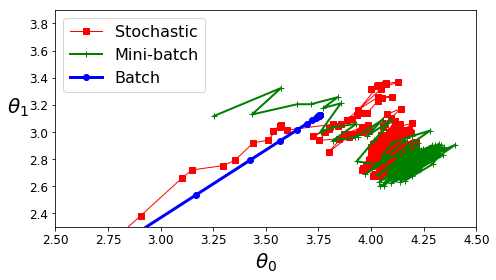

In [55]:

plt.figure(figsize=(7,4))
plt.plot(param_vec_path_sgd[:, 0], param_vec_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(param_vec_path_mbgd[:, 0], param_vec_path_mbgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(param_vec_path_bgd[:, 0], param_vec_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

Let's compare the algorithms we've discussed so far for Linear Regression. 
<img src="images/training_linear_models/gd_comparison.png">
- When the number of training examples is large, don't even think about using BatchGD. You can use the other 3. 
- When you want online/out-of-core support, you have one two options: 
    - SGD
    - mbGD
- When the number of features is large, don't even think about using Normal Equation, you can use the other 3. 
- If you prefer having small number of hyperparameters, prefer NE or BGD, else go for other 2. 
- Unless you're performing Gradient Descent, you don't need to use Feature Scaling. 
- Sklearn does not automate BGD or mbGd. You can perform Linear Regression using NE, using the `LinearRegression` class. You can also perform Linear Regression using Stochastic Gradient Descent using `SGDRegressor` class. 
- There is almost no difference __after training__ : All these algorithms end up with very similar model and make predictions in exactly the same way. 


# Polynomial Regression: 

- If your data looks more complex than a single straight line, you can use a linear model ton fit non-linear data. 
- A simple way to do this is to add powers to each feature. This makes new features. You can train a linear model on this extended set of features. 
- This technique is called _Polynomial Regression_.   

Generating some simple non -linear data based on a simple quadratic equation. 

In [56]:
m = 100 
np.random.seed(42)
X = 6*np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)


In [57]:
X[:10], X.shape

(array([[-0.75275929],
        [ 2.70428584],
        [ 1.39196365],
        [ 0.59195091],
        [-2.06388816],
        [-2.06403288],
        [-2.65149833],
        [ 2.19705687],
        [ 0.60669007],
        [ 1.24843547]]), (100, 1))

In [58]:
y[:10], y.shape

(array([[ 1.61761105],
        [ 8.06185944],
        [ 4.45250583],
        [ 0.77958493],
        [ 1.84625712],
        [ 2.42319555],
        [ 4.34161741],
        [ 6.09231611],
        [ 1.98223289],
        [ 3.52597398]]), (100, 1))

- X is a (100,1) array with each number  = $6 \times$ random number $-$ 3.
- y is a (100,1) array with each number = $0.5X^2 + X + 2 + $ random number

array([ -3.,   4.,  -0.,  11.])

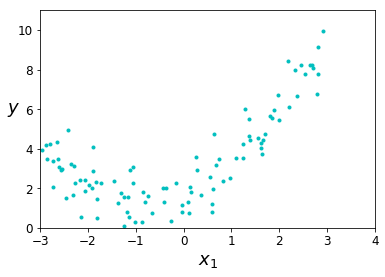

In [59]:
plt.plot(X,y, 'c.')
plt.xlabel("$x_1$", fontsize = 18)
plt.ylabel("$y$", fontsize = 18, rotation = 0)
plt.axis(np.ceil([X.min() - 1,X.max() + 1, y.min() - 1,
                 y.max() + 1]))

- Clearly, a straight line will never fit this data properly. 
- So let's use SkLearn's [__`sklearn.preprocessing.PolynomialFeatures(degree =2 , interaction_only = False, include_bias = True)`__](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) class to transform our training data, adding the square (2nd degree polynomial) of each feature in the training set as new features (in this case, there is just one feature): 
    - Generate polynomial and interation features. 
    - Generates a new feature matrix consisting of all the features with degree less than or equal to the specified degree. 
    - For example, if an input sample is two dimensional and of the form [a,b], the degree-2 polynomial features are [1, a, b, a$^2$ , ab, b$^2$]. 
    - Be away that the number of features in the output array scaled polynomially in the number of features of the input array, 
    - and scaled exponentially in the degree.
    - High degrees can cause overfitting. 
    
```python 
from sklearn.preprocessing import PolynomialFeatures

X = np.arange(6).reshape(3,2)
X
# array([[0, 1],
#        [2, 3],
#        [4, 5]])

poly = PolynomialFeatures(2)
poly.fit(X) # The .fit(X, y = None) takes in an 2D input
            # array, with shape (n_samples, n_features)
            # This just computes the number of output
            # features. 
            
poly.fit_transform(X) # The .fit_transform(X, y=None, 
                      #  **fit_params)
                      # Fits the data X, a 2D input array
                      # with shape (n_samples, n_features).  
                      # Returns a transformed version of 
                      # X with shape:
                      # (n_samples, n_features_new)
                        
# array([[  1.,   0.,   1.,   0.,   0.,   1.],
#        [  1.,   2.,   3.,   4.,   6.,   9.],
#        [  1.,   4.,   5.,  16.,  20.,  25.]])
```

In [60]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, 
                                   include_bias = False)
# We are not including a bias because we will add it 
# later (maybe). 
X_poly = poly_features.fit_transform(X)
X[:10]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816],
       [-2.06403288],
       [-2.65149833],
       [ 2.19705687],
       [ 0.60669007],
       [ 1.24843547]])

In [61]:
X_poly[:10], X_poly.shape

(array([[-0.75275929,  0.56664654],
        [ 2.70428584,  7.3131619 ],
        [ 1.39196365,  1.93756281],
        [ 0.59195091,  0.35040587],
        [-2.06388816,  4.25963433],
        [-2.06403288,  4.26023172],
        [-2.65149833,  7.03044338],
        [ 2.19705687,  4.82705891],
        [ 0.60669007,  0.36807284],
        [ 1.24843547,  1.55859111]]), (100, 2))

- `X_poly` now contain the original feature of `X` plus the square of this feature. 
- Now, you can fit a `LinearRegression` model to this extended training data. 


In [62]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_ , lin_reg.coef_

(array([ 1.78134581]), array([[ 0.93366893,  0.56456263]]))

In [63]:
param_vec = lin_reg.coef_
X_poly.shape, param_vec.shape

((100, 2), (1, 2))

In [64]:
prediction_y = lin_reg.intercept_ + X_poly.dot(param_vec.T)

In [65]:
from sklearn.metrics import r2_score
r2_score(y, prediction_y)

0.85250675190097447

## Potting the curve best fit to the model: 
- For this, we will have to create a smooth set of points between our range of input values `(X.min() , X.max()`):
    - `(-2.9668672972583856, 2.9213216196031038)`
- Therefore, we will lets plot a smooth set of unique points between -3 and 3. Smooth meaning, each number in the array will be equally far from the point before and after it. 
- __We need a smooth set of points, or else we will get this__: 

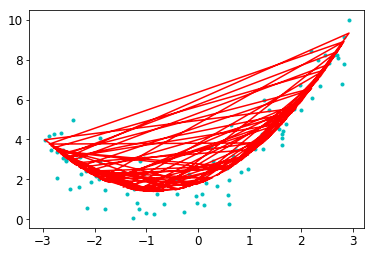

In [66]:
plt.plot(X,y, "c.")
plt.plot(X, prediction_y, "r-")

Saving figure:  quadratic_predictions_plot


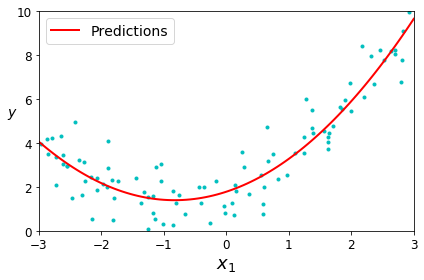

In [67]:
X_new = np.linspace(-3, 3, 100).reshape(100,1)
# This is the hypothetical input array with a smooth
# set of points. 
# np.linspace creates a set of points evenly distributed 
# between -3 and 3
# We reshape it, to be just like the original X array. 

X_new_poly = poly_features.transform(X_new)
# These features will be used to make the predictions. 

y_pred = lin_reg.predict(X_new_poly)
# These are the set of preditions made using the parameters
# of the linear regression model. 

plt.plot(X, y, "c.")
# Scatter plot of original X, y data. 

plt.plot(X_new, y_pred,"r-", linewidth = 2, 
         label = "Predictions" )

plt.xlabel("$x_1$", fontsize = 18 )
plt.ylabel("$y$", rotation =0,  fontsize = 14)
plt.legend(loc = "upper left", fontsize = 14)
plt.axis([-3, 3, 0 , 10])
save_fig("quadratic_predictions_plot")

Not bad, the model estimates: 
- ### $ \hat{y} = 1.78 + 0.93x_1 + 0.56x_1^2 $ when in fact, the origina function is: 
- ### $ {y} = Gaussian Noise + 2 + 1.0x_1 + 0.5x_1^2 $
- Note that when there are multiple features, Polynomial Regression is capable of finding relationships between features, which is something that __plain linear regression cannot do__ .
- DOUBT: Does this mean if i have multiple features, i cannot use `SGDRegressor` or `LinearRegression`. For example, if i have normal data, just with multiple features and a simple y label column. Would i have to use Polyfeatures or something? 

- This is made possible

# Learning Curves: 

- Lets have a look at how different degree polynomials fit the data differently: 
- Revising `Pipelines`: 
- There are many data transformation steps that need to be exectured in the right order. 
- __`Pipeline`__ class helps with such sequence of tranformations.    
- Recall that `housing_num` is 2D numpy array extracted from out housing dataframe, excluding the `ocean_proximity` column. In other words, it also have numerical attributes. 
- The `Pipeline` constructor takes a list of `name,estimator` pairs defining a sequence of steps. The `names` cane be anything as long as they do not contrain double underscores "`__`". 
- All but the last estimator must be `transformer`s (i.e they must have a `fit_transform()` method. 
- When you call the pipeline's `fit()` method, it calls the `fit_transform()` sequentially on all the transformers, passing the output of each call as the parameter to the next call, until it reached the final estimator, for which it just calls the `fit()` method. 
- The pipeline exposes the same methods as the final estimator. 
- In the following code, the last estimator is also a `transformer`, so the pipeline has a `transform()` method that applies all the tranforms to the data in sequence. 
- The pipeline also has a `fit_tranform()` method. 
- Note: The input to the `fit_tranform` is a 2D numpy array.

Saving figure:  high_degree_polynomials_plot


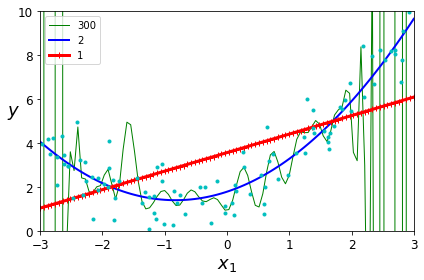

In [68]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-",1,300), ("b-", 2, 2),
                            ("r-+", 3, 1)):
    polybig_features = PolynomialFeatures(degree = degree,
                                         include_bias = False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline(
    [
    ("poly_features", polybig_features),
    # >>  Creats the features according to the degree of
    # the polynomial. 
    # Note that this is a transformer, so the pipeline
    # will call the fit_transform method returning the
    # new input array, with new features. 
    # y is set to None, as it's a parameter passed into
    # the pipeline. 
        
    ("std_scaler", std_scaler),
    # Standardizes each column / feature of the input
    # matrix.  
    # Again, this is a transformer so the fit_transform
    # method will be called. 
    # Note, y is taken in the fit_transform method of 
    # StandardScaler, mainly for `pipeline` compatability.
    # It is is set to none.
    # fit_transform(X, y=None, **fit_params)
        
        
    ("lin_reg", lin_reg)
    # This is not a tranformer, but a Predictor. 
    # therefore, the pipeline will fit (X,y) to this 
    # Linear Regression model. 
        ])
    polynomial_regression.fit(X,y)
    # Calling all fit_transform of the transformers.
    # and calling fit on the last estimator/predictor. 
    # Has fit the parameters required for linear regression. 
    
    # Recall, X_new is an array of evenly distributed
    # 100 values betwen -3 and 3. 
    # Let's predict for these values using the set parameters. 
    
    
    y_pred = polynomial_regression.predict(X_new)
    # The predict method of pipeline applies transforms
    # on the data `X_new` and then predicts with final 
    # estimator. 
    
    plt.plot(X_new, y_pred, style, label = str(degree),
            linewidth = width)
    
plt.plot(X, y, "c.")
plt.legend(loc = "upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
save_fig("high_degree_polynomials_plot")


- We previously used cross validation to get an estimate of a model's generalization performance. 
    - If you model performs well on the training data, but generalizes poorly according to the cross validation metrics, then your model is overfitting. 
    - If it performs poorly on both the training and testing set, it is underfitting. 
    - Here comes the concept of _learning curves_. 
        - These are plots of the model's performance on the training set and the validation set as a function of the training set size. 
        - To generate the model, we will several models on different sized subsets of the training set. 
        - Here is the code: 
        

In [69]:
# To measure performance
from sklearn.metrics import mean_squared_error
# To split the data
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    # First, split the data into training and validation
    # sets
    X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                     test_size = 0.2,
                                                     random_state = 10)
    
    # Make list of training set errors, used for plotting
    train_errors = []

    # Make list of testing set errors, used for plotting
    val_errors = []

    # Loop through all possible traing_set_sizes: 
    for m in range(1, len(X_train)):
        
        # Starting with 1 training example, fit the model to 
        # the training set
        model.fit(X[:m], y_train[:m])
        
        # Make predictions on whatever much data you have 
        # trained on
        y_train_predict = model.predict(X_train[:m])
        
        # Make predictions on whole set of unseen validation
        # data
        y_val_predict = model.predict(X_val)
        
        # Measure MSE on both training and validation
        # sets , append it to their respective error lists. 
        train_errors.append(mean_squared_error(
            y_train_predict # y_pred
            ,y_train[:m]) # y_true
                           )
        
        val_errors.append(mean_squared_error(
        y_val_predict, # y_pred
            y_val) # y_true
                         )
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth = 2, label = "train")
    plt.plot(np.sqrt(val_errors), "y-", linewidth = 3, label = "val")
    plt.legend(loc = "upper right", fontsize = 14)
    plt.xlabel("Training Set Size", fontsize = 14)
    plt.ylabel("RMSE", fontsize = 14)

- #### Recall how the data looks:

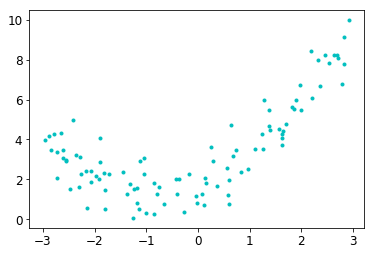

In [70]:
plt.plot(X,y,"c.")

Saving figure:  underfitting_learning_curves_plot


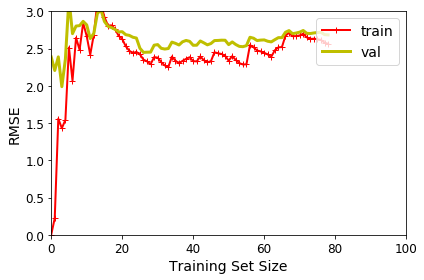

In [71]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0,100, 0, 3])
save_fig("underfitting_learning_curves_plot")

- Now, this deserves a bit of an explanation. 
    - Looking at training set: 
        - When there are just 0,1, 2 instances, the model is able to fit them well. That is why the error starts at 0. 
        - But as new instances are added, it becomes really difficult for the model to fit the training data perfectly. 
        - Both, because the data is noisy, and because it is not linear at all. 
        - The error on the training set goes up until it plateaus where it does not increase or decrease much. 
    - Now, about the cross validation model: 
        - The reason the cross validation error is that big at the start is because when the model is trained on very little training data, it is not able to generalise well. 
        - Then, as the data given to model keeps on increasing, the validation error does go down. However, a straight line really can't do much here. That is why, the error ends up at a plateau, very close to the curve. 
- __NOTE__: If your model is underfitting the training data, adding more training examples will not help. 
    - You need:
        - a more complex model 
        - Come up with better features
        
__Now, we will demonstrate what `learning curves` of overfitting look like: __ 


In [72]:
# train_errors

Saving figure:  learning_curves_plot


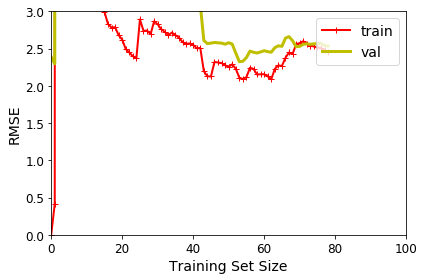

In [73]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ))

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 100, 0, 3])           # not shown
save_fig("learning_curves_plot")  # not shown

- Though there seems to be some error. The learning curves of a model that overfits do not seem like this. 
    - The training error is always low, as it memorizes the triaing set. 
    - There is always a gap between the training error curve and the validation error curve. This means the model performs way better on the training data, than on the testing data. 
    - However, if you use a much larger training set, the two curves will continue to get closer and closer.   
    
__TIP__: One way to improve an overfitting model is to feed it more training data until the validation error reaches the training error. 

 __The Bias / Variance Tradeoff__:  
- An important theoretical result of statistics and Machine Learning is the fact that a model's generalization error can be expressed as the sum of three very different errors: 
    - __Bias__: This means that you're biased about the model being simple, like a linar model. When in fact, it is more complex than what you _assume_. 
    Note: This is not to be confused with the bias term used in the $\theta$ vector, which is the _zero condition_ or _intercept_. 
    - __Variance__: In simple english, is the fact/quality of being inconsistent/divergent. In machine learning terms, this means that your model is sensitive to small variations in the dataset. A high degree model ( A model with many [degrees of freedom](https://www.youtube.com/watch?v=9ONRMymR2Eg) ) is lekely to have high variance, and thus, a tendency to overfit the training data. 
    - __Irreducible Error__: This parts is due to the noisiness of the data itself. The only way to reduce this is to _fix the data_. That is, clean up the data ( fill `NaNs`, fix sources (sensors) , remove outliers ). 
- Why is it called a tradeoff? 
    - Increasing a model's complexity will typically increase it's variance and reduce it bias. 
    - Conversely, reducing a model's complexity will typically increase its bias and reduce its variance. 

## Regularized Linear Models: 


- good way to reduce overfitting. 
    - The fewer degrees a model has, the harder for it to overfit the data.
    - In other words, the fewer the number of values which are free to vary, the harder for it is for the model to overfit the data. 
    - Example: 
        - Reduce the number of polynomial degrees. 
        - Contrain/penalise the weights
    - There are 3 ways to penalise/constrain the weights of the model. 
        - Rdige Regression
        - Lasso Regression
        - Elastic Net

- ### [Vector Norms](https://www.youtube.com/watch?v=5fN2J8wYnfw): 
    - __The L2 norm__:
        - is basically, the traditional way of measuring the magnitude of the vector. 
        - That is the square root of the sum of squares of the elements in the vector.
        - It is also known as the distance of the vector point from the origin, or how long the vector is. 
        - # $\sqrt{[e_1^2 + e_2^2 + .... e_n^2]}$
    
    - __The L1 Norm:__ 
        - # $ |e_1| + |e_2| + .... + |e_n|$

https://classroom.udacity.com/nanodegrees/nd009/parts/1d267043-f968-4853-9128-56f88f519d46/modules/fba0f90c-b76e-4735-89ed-09188d15b9f4/lessons/9b5563ae-6f3d-4278-85ff-92fcbe1c1c37/concepts/0d81ce82-2135-4dfe-9f2a-2b1b57ac09d7
- [What is R Squared?](https://www.youtube.com/watch?v=g2ext963IZg&index=2&list=PLvcbYUQ5t0UFhdkiCojiFOygmbMU19BFq) __SEE MD BLOCK ABOVE [35] -E2EMLP__    
    - helps in measuring how well the hypothesis fits the training set.
    - SST ( Sum of Squared Totals )  is the squared difference between the the actual value $y$ and the mean of the actual values $\bar{y}$ 
        - # $ \sum_i (y_i - \bar{y})^2 $ 
        - It tells us how far the actual value is from its mean. 
    - SSE ( Sum of Squared Explained) is the squared difference between the predicted value and the mean of the actual values $\bar{y}$. 
        - # $ \sum_i (\hat{y_i} - \bar{y})^2 $ 
        - This tells us how much the model is explaining the variation of Y (from the mean). 
        
    - SSR (Sum of Squared Residulals ) is the sum of squared difference between true value $y_i$ and the predicted value $\hat{y_i}$.
        - This tells us how much the model is __not__ explaining the variation of Y (from the mean).
    - R squared  is a measure __explained variation in the Y variable__.
    - # $ 1 - \frac{SSR}{SST} $ 
    - SSR is the ammount of unexplained variation in Y(true target) by the prediction model. 
    - SST is the total amount of variation in the true target Y. 
    - Therefore $\frac{SSR}{SST} $ is the % of the unexplained variation in Y by the prediction model. 
        - Answers the question: what percentage of variation in Y is __not__ explained by X / the prediction model. 
    - Therefore, 1 - % unexplained variation in Y is equal to the % explained variation in Y by X/ the prediction model. 
    
    

### [Ridge Regression](https://www.youtube.com/watch?v=5asL5Eq2x0A&index=5&list=PLvcbYUQ5t0UFhdkiCojiFOygmbMU19BFq): 
- also called _Tikhonov regularization_ is a regularisizes version of Linear Regression. 
- A regularization term equal to the (sum of the squares of each weight ) multiplied by alpha, the regularization hyperparameter is sufixxed to the cost function. 
- # $\alpha\sum_{i=1}^{n}\theta_i^2$
- As our aim is to minimise the cost function, adding the regularization term to the it will force the model to:
    - fit the data
    - and keep the weight as low as possible   
    
DOUBT: 
- Note, regularization term is only supposed to be added during training. 
- Once the model's trained, you would want to evaluate the model's performance using the unregularized performance measure. 
- The hyperparameter $\alpha$ controld how much you want to regularize the model. 
    - If $\alpha$ = 0 , then Ridge Regression is just Linear Regression. 
    - If $\alpha$ is very large, then all weights end up very close to zero (the slope of the line will be close to 0, and the intercept too), therefore, the result is a flat line going through the data's mean. 
    - ## $ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}x^i - y^i)x_j^i + \alpha\frac{1}{2}\sum_{i=1}^{n}\theta_i^2 $
    - Note that the bias term $\theta_0$ is not penalised/regularised ( the sum starts at i = 1, not 0). 
    - Note: It is very important to scale the data using `StandardScaler` before performing Ridge Regression, as it is sensitive to the scale of the input features. This stands true for most regularized models. 
    

- [__`sklearn.linear_model.Ridge()`__](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html)
    - Linear least squares l2 regularization. 
    - Thi smodel solves a regression model where the loss function is the linear least square function (MSE), and the regularization is given by the l2 norm. 
    - The estimator has support for multivariate linear regression, where `y` is a 2D array of shape `[n_samples, n_targets]`. 
    - PARAMETERS: 
        - alpha: Regularization strength
        - fit_intercept: whether to calculate the intercept for the model , default  = `True`
        - normalize: default `False`, regressors X will be normalised before regression by subtracting the mean and dividing by the l2 norm. 
            - You can first standardize using `StandardScaler` before calling `Ridge.fit` with `normalize` = False. 
        - copy_X: bool
        - max_iter: defaulted to 1000
        - tol: Precision of the solution. default -.--1
        - solver: default "auto" 
            - auto chooses the solver automatically based on the type of data
            - 'svd'__ uses a Singular Value Decomposition of X to compute the Ridge coefficients. More stable for singular matrices than ‘cholesky’__.
            - "cholesky" uses the standard `scipy.linalg.solve` function to obtain a __closed form solution__ (Normal Equation)
            - "lsqr" uses the dedicated regularizes least-squares routine `scipy.sparse.linalg.lsqr`.
            - "sag" uses a Stochastic Average Gradient Descent, and "saga" used its improved, unbiased persion. 
                - Both methods use an iterative procedure, and are often faster than other solvers whe both n_samples and n_features are large. 
                - Note that fast convergence is onlt guaranteed when features are on a similar scale. 
             - All the last 5 solvers support both dense and sparse data. However, "sag" and "saga" supports sparse input when fit_intercept is True.
         - random_State: psudo random number seed. 

    - ATTRIBUTES: 
        - `coef_ `: Weight vector(s) , shape (`n_features`) or(`n_targets, n_features`. 
        - `intercept_`: float / array, shape = (`n_targets`)
        - `n_iter_` : array or None, shape (n_targets,)
             - Actual number of iterations for each target. Available only for sag and lsqr solvers. Other solvers will return None.  

```python

from sklearn.linear_model import Ridge
import numpy as np

n_samples, n_features = 10, 5
np.random.seed(0)
y = np.random.randn(n_samples)
y
# array([ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ,  1.86755799,
#        -0.97727788,  0.95008842, -0.15135721, -0.10321885,  0.4105985 ])
X = np.random.randn(n_samples, n_features)
X[0]
# array([ 1.86755896,  0.90604466, -0.86122569,  1.91006495, -0.26800337])
clf = Ridge(alpha = 1.0)
clf.fit(X, y)
# Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
#    normalize=False, random_state=None, solver='auto', tol=0.001)
clf.score(X,y)
# 0.38
```

In [74]:
from sklearn.linear_model import Ridge

np.random.seed(42)
m = 20
X = 3 * np.random.rand(m,1)
X[:10], X.shape

(array([[ 1.12362036],
        [ 2.85214292],
        [ 2.19598183],
        [ 1.79597545],
        [ 0.46805592],
        [ 0.46798356],
        [ 0.17425084],
        [ 2.59852844],
        [ 1.80334504],
        [ 2.12421773]]), (20, 1))

In [75]:
y = 1 + 0.5 * X + np.random.randn(m,1)/1.5
y[:10]

array([[ 0.88658943],
       [ 2.63556968],
       [ 1.49264153],
       [ 0.95645193],
       [ 2.21112714],
       [ 1.08347425],
       [ 1.13214422],
       [ 1.34943209],
       [ 1.5387507 ],
       [ 2.13605726]])

- X  is a (20,1) array with each row elements equalt to a random number multiplied by 3. 
- y is the targer array of shape (20,1) with each target equal to 1 + (0.5$*$X) __plus__ (gausian noise divided by 1.5).


In [76]:
X.min(), X.max(), y.min(), y.max()

(0.06175348288740734,
 2.9097295564859831,
 0.26354768982883514,
 2.7053301238067728)

array([-0.,  4., -0.,  4.])

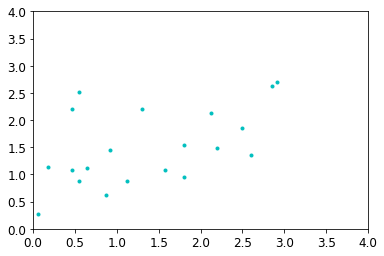

In [77]:
plt.plot(X,y,"c.")
plt.axis(np.ceil([X.min() - 1, X.max() + 1, 
                  y.min() - 1, y.max() + 1]))

In [78]:
X_new = np.linspace(0,3,100).reshape(100,1)
# >> Creating 100 values between 0 and 3 as the input values 
# range from 0 to 3. 
# This will be used to plot the graphs. 

- So what does this code do: 
    - The function `plot_regularized_model` takes in these arguments: 
        - A regularized model
        - Whether the regression is to be polynomial regression or linear regression. 
        - The different alphas you want to check out. 
        - other arbitrary arguments.
   - For each alpha value we input:
       - We first check what model we will be using to fit the data. If alpha is greater than 0, we understand that we do need to regularise the model using `sklearn.linear_model.Ridge`. Otherwise, we can use simple `LinearRegression`. 
       - Once we check whether or not to reugularize the model, we check whether it's a polynomial model or a degree 1 model. 
           - If we have to perform Polynomial Regression, we need to do some preprocessing. 
               - First we create the polynomial features according to the degree of the polynomials. 
               - Next, we standardize each feature in the new polynomial features matrix. 
               - Next, we fit the new feature matrix and  model to the `Ridge`/`LinearRegression` model depending on what the alpha value is. 
           - If we don't have to perform Polynomial Regression, we just fit the `Ridge`/`LinearRegression` model depending on what the alpha value is. 
       - Finally, we make out predictions with the model we have using the `X_new` input array we created. 
       

- So for example when we call: 

````python

plot_regularized_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)

```
   - For each alpha value = 0:
       - `model = LinearRegression()` as there is no regularization. 
       - Next, here we are dealing with only degree 1 models, so we won't go through the polynomial preprocessing steps. 
       - `X` and `y` are `(20,1)` array of numbers. 
       - We fit (`X`, `y`) to the `LinearRegression` model.
       - We make a prediction using the `X_new` which are 100 equally distributed input values between 0 and 3. 
       
       - We plot our predictions against `X_new`, using the unregularized linear regression model, (blue line).
    - For each alpha value = 10:
       - `model = RidgeRegresson(10, random_state = 42)` as there is regularization. 
       - Next, here we are dealing with only degree 1 models, so we won't go through the polynomial preprocessing steps. 
       - We fit (`X`, `y`) to the `RidgeRegression` model.
       - We make a prediction using the `X_new` which are 100 equally distributed input values between 0 and 3. 
       
       - We plot our predictions against `X_new`, using the regularized linear regression model ( green line ). 
       
    - For each alpha value = 100:
       - `model = RidgeRegresson(100, random_state = 42)` as there is HIGH regularization. 
       - Next, here we are dealing with only degree 1 models, so we won't go through the polynomial preprocessing steps. 
       - We fit (`X`, `y`) to the `RidgeRegression` model.
       - We make a prediction using the `X_new` which are 100 equally distributed input values between 0 and 3. 
       
       - We plot our predictions against `X_new`, using the highly regularized linear regression model (red line) 
       
       
      
       

Saving figure:  Ridge_Regression_Plot


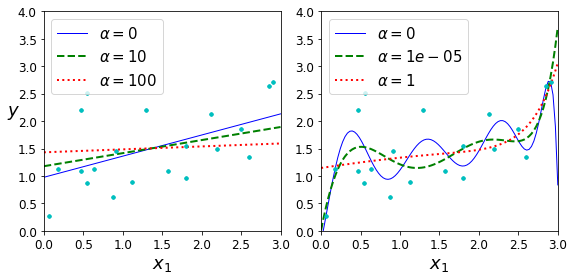

In [79]:
def plot_regularized_model(model_class, polynomial, alphas,
                          **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        # First check if there is any regularization happening
        # If yes, use Ridge Regression
        # If not, use Linear Regression
        if alpha > 0:
            model = model_class(alpha, **model_kargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree = 10,
                                                    include_bias = False)),
                ("std_scaler", StandardScaler()),
                ("regul_reg", model),
            ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        if alpha > 0:
            lw = 2
        else:
            lw = 1
        plt.plot(X_new, y_new_regul, style, linewidth = lw,
                label = r"$\alpha = {}$".format(alpha))
        plt.plot(X, y, "c.", linewidth = 3)
        plt.legend(loc = "upper left",  fontsize = 15)
        plt.xlabel("$x_1$", fontsize = 18)
        plt.axis([0, 3, 0, 4])
        
plt.figure(figsize = (8,4))
plt.subplot(121)
plot_regularized_model(Ridge, polynomial = False, alphas = (0, 10, 100), random_state = 42)
plt.ylabel("$y$", rotation = 0, fontsize = 18)
plt.subplot(122)
plot_regularized_model(Ridge, polynomial = True, alphas = (0, 10**-5, 1),
          random_state = 42)
save_fig("Ridge_Regression_Plot")

- The above shows several Ridge models trained on some linear data using different $\alpha$ value. 
- On the left, plain Ridge models are used, leading to linear predictions. 
- On the left, the input data is first expanded using `PolynomialFeatures(degree = 10)`, then it is scaled using a `StandardScaler` and finally a `Ridge` model are applied to the resulting features. 
    - This is Polynomial Regression with `Ridge Regularization`. 
- Notice how increasing alpha leads to a flatter (less extreme and more reasonable prediction. 
- This reduced the models variance but increases its bias. 

- Remember how we could perform Linear Regression by 2 ways: 
    - Normal Equation (closed form)
    - Gradient Descent
- Closed form Solution to perform Linear Regression without Regularization: 
    - **Equation 4-4: Normal Equation**

    - # $\hat{\mathbf{\theta}} = (\mathbf{X}^T \cdot \mathbf{X})^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y}$
- Closed Form Solution to perform Ridge Regression / Regression with regularization : 
    - **Equation 4-9: Ridge Regression closed-form solution**
    - # $\hat{\mathbf{\theta}} = (\mathbf{X}^T \cdot \mathbf{X} + \alpha \mathbf{A})^{-1} \cdot \mathbf{X}^T \cdot \mathbf{y}$
        - Here, $ \mathbf{A}$ is an $ n \times n$ _identity matrix_ , except with a 0 in the top left cell, corresponding to the bias term. 
        - Here is the code to perform `RidgeRegression` with SchikitLearn using a closed form Solution ( a variant of the equation above using matrix factorization technique by Andre - Louis Cholesky). 
        - cholesky" uses the standard [__`scipy.linalg.solve`__](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.linalg.solve.html) function to obtain a __closed form solution__ (Normal Equation)
        

In [80]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha = 1, solver = "cholesky",
                 random_state = 42)
ridge_reg.fit(X, y)


Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=42, solver='cholesky', tol=0.001)

In [81]:
ridge_reg.predict([[1.5]])


array([[ 1.55071465]])

__Performing Ridge Regression using Stochastic Gradient Descent (only option of GD in sklearn)__: 
- The `"penality"` hyperparameter decides which kind of regularization you want to use. 
- Specifying `"l2"` indicated that you want to perform Stochastic Gradient Descent on the cost function with regulatization term equal to half the square of $l_2$ norm of the weight vector. 
- In other words, Specifying `"l2"` indicated that you want to perform minimise the cost function using SGD, while penalising the weights according to Ridge Regression. 



In [82]:
sgd_reg = SGDRegressor(penalty = "l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([ 1.12795912])

# Lasso Regression: 


_Least Absolute Shrinkage and Selection Operator Regression_ (simply called Lasso Regression) is another regularized version of Linear Regression. 
- Just like Ridge Regression, adds a regularisation term to the cost function, but it uses the $l_1$ norm of thw weight vector instead half of the square of the $l_2$ norm in Ridge Regression. 
- ## $ J(\theta)  = \frac{1}{2}\sum_{i=1}^m(h_{\theta}x - y) + \alpha\sum_{i=1}^n|\theta_i| $ 
- An important characteristic of Lasso Regreesion is that it tends to completely eleimate the weights of the least important features (i.e. it sets the weights of the least important features to 0). 
- For example, in the below right subplot (Polynomial Regression). When $\alpha = 10^{-7}$, the green line doesn't seem much quadratic... it seems a little linear. This is because all the wights for the high degree polynomial features are set to 0. 
- On other words, Lasso Regression automaticallly performs feature selection and outputs a _sparse model_, (i.e with only a few non-zero feature weights, most weights are set to 0)



Saving figure:  lasso_regression_plot


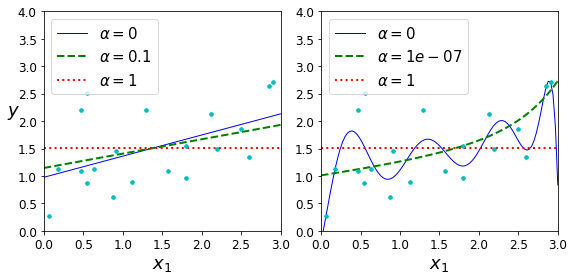

In [83]:
from sklearn.linear_model import Lasso

plt.figure(figsize = (8,4))
plt.subplot(121)
plot_regularized_model(Lasso, polynomial = False, 
                      alphas = (0, 0.1, 1),
                      random_state = 42)
# Performs closed form LinearRegression (alpha 0). (Blue)
# Then, performs Ridge Regression, i.e Linear Regression
# with l_2 regularisation term. (Greed Dashed)
# Then again performs Ridge Regression, with alpha = 1.
# (Red line)
plt.ylabel("$y$", rotation = 0 , fontsize = 18)

plt.subplot(122)
plot_regularized_model(Lasso, polynomial  = True,
                      alphas = (0, 10**-7, 1),
                      tol = 1, random_state = 42)
# Performs closed form Linear Regression with 
# multiple higher degree features. (alpha 0 )(Blue line)
# Performs Polynomial Regression with l_1 regularization
# / Lasso Regression with alpha - 10**-7 and alpha = 1. 

save_fig("lasso_regression_plot")

In [84]:
X

array([[ 1.12362036],
       [ 2.85214292],
       [ 2.19598183],
       [ 1.79597545],
       [ 0.46805592],
       [ 0.46798356],
       [ 0.17425084],
       [ 2.59852844],
       [ 1.80334504],
       [ 2.12421773],
       [ 0.06175348],
       [ 2.90972956],
       [ 2.49732792],
       [ 0.63701733],
       [ 0.5454749 ],
       [ 0.55021353],
       [ 0.91272673],
       [ 1.57426929],
       [ 1.29583506],
       [ 0.87368742]])

__Conducting Lasso Regression using 

In [85]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
y_pred = lasso_reg.predict(X)

from sklearn.metrics import r2_score
r2_score(y, y_pred)

0.2318689079197197

In [86]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# ignoring bias term
t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[-1, 1], [-0.3, -1], [1, 0.1]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])


Saving figure:  lasso_vs_ridge_plot


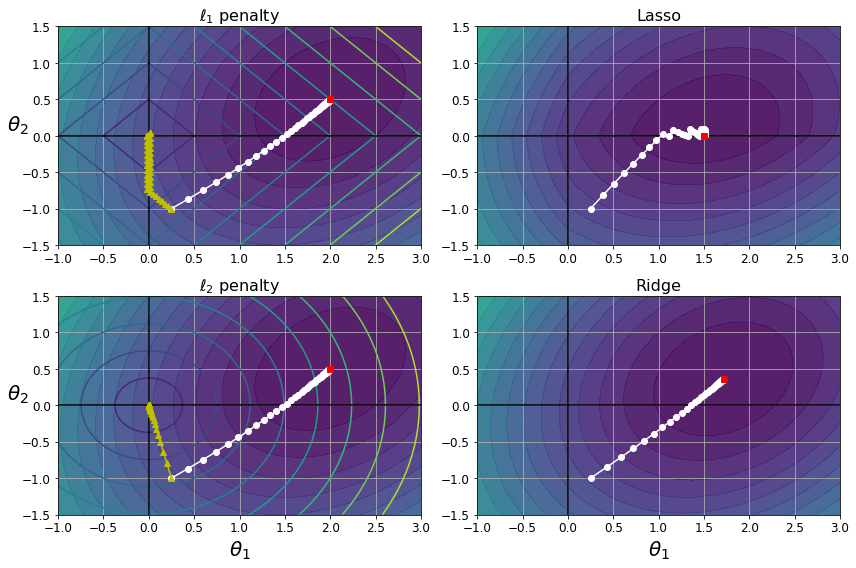

In [87]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.1, n_iterations = 50):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + 2 * l2 * theta

        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

plt.figure(figsize=(12, 8))
for i, N, l1, l2, title in ((0, N1, 0.5, 0, "Lasso"), (1, N2, 0,  0.1, "Ridge")):
    JR = J + l1 * N1 + l2 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(t_init, Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    plt.subplot(221 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, J, levels=levelsJ, alpha=0.9)
    plt.contour(t1, t2, N, levels=levelsN)
    plt.plot(path_J[:, 0], path_J[:, 1], "w-o")
    plt.plot(path_N[:, 0], path_N[:, 1], "y-^")
    plt.plot(t1_min, t2_min, "rs")
    plt.title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])

    plt.subplot(222 + i * 2)
    plt.grid(True)
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    plt.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    plt.plot(t1r_min, t2r_min, "rs")
    plt.title(title, fontsize=16)
    plt.axis([t1a, t1b, t2a, t2b])

for subplot in (221, 223):
    plt.subplot(subplot)
    plt.ylabel(r"$\theta_2$", fontsize=20, rotation=0)

for subplot in (223, 224):
    plt.subplot(subplot)
    plt.xlabel(r"$\theta_1$", fontsize=20)

save_fig("lasso_vs_ridge_plot")
plt.show()

The background contorus(ellipses) represent an unregularized MSE cost function $\alpha = 0$, and the white circles show the Batch Gradient Descent path with the cost function. 

# Early Stopping: 
- A very different way to regularize iterative learning algorithms such as Gradient Descent is to stop training as soon as th validation error reaches a minimum.
- This is called _early stopping_. 
- The following code show a complex model. In this case a high degree Polynomial Regression model being trained using Batch Gradient DEscent. 
- As the epochs go by, the algorithms learns and its prediction error (RMSE) on the training set naturally goes down, ans so does its prediction error on the validation set. 
- However, after sometime, the validation error stops decreasing and avtually starts to go back up. 
- This indicated that the model has started to overfit/memorise the training set, and is suddenly failing to generalise to the validation set. 


In [88]:
np.random.seed(42)
m = 100
X = 6*np.random.rand(m,1) - 3
print(X[:10])
X.shape

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


(100, 1)

In [89]:
y = 2 + X + 0.5 * X**2 + np.random.randn(m,1)
print(y[:10])
y.shape

[[ 1.61761105]
 [ 8.06185944]
 [ 4.45250583]
 [ 0.77958493]
 [ 1.84625712]
 [ 2.42319555]
 [ 4.34161741]
 [ 6.09231611]
 [ 1.98223289]
 [ 3.52597398]]


(100, 1)

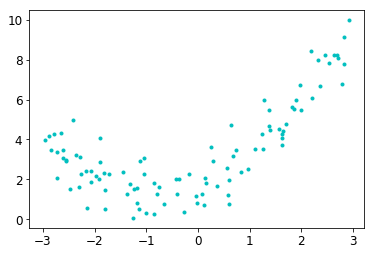

In [90]:
# How the data looks
plt.plot(X, y, "c.")

In [91]:
# Splitting the data into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(
    X[:50], y[:50].ravel(), test_size = 0.5,
    random_state = 10)

# Note: y is inputted as a 1D array
# 1/4 data is validation set
# 1/4 data is training set
X_train.shape , X_val.shape , y_train.shape , y_val.shape

((25, 1), (25, 1), (25,), (25,))

In [92]:
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 90, 
                                        include_bias = False)),
    ("std_scaler", StandardScaler())
])

In [93]:
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
# Note: We used fit_transform as this pipeline
# only has transformers.
pd.DataFrame(X_train_poly_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,-1.107865,0.686809,-0.982914,0.302036,-0.705237,0.015832,-0.491745,-0.157565,-0.355345,-0.255037,...,-0.196916,-0.220417,-0.197335,-0.219231,-0.197731,-0.218131,-0.198104,-0.21711,-0.198457,-0.216164
1,-0.894713,0.153643,-0.561329,-0.201489,-0.329421,-0.347604,-0.225721,-0.392199,-0.185339,-0.397965,...,-0.196916,-0.220417,-0.197335,-0.219231,-0.197731,-0.218131,-0.198104,-0.21711,-0.198457,-0.216164
2,-0.592809,-0.438756,-0.191675,-0.551912,-0.120686,-0.509543,-0.130170,-0.460438,-0.145142,-0.425540,...,-0.196916,-0.220417,-0.197335,-0.219231,-0.197731,-0.218131,-0.198104,-0.21711,-0.198457,-0.216164
3,-0.596273,-0.433042,-0.194647,-0.549583,-0.121823,-0.508824,-0.130512,-0.460242,-0.145234,-0.425490,...,-0.196916,-0.220417,-0.197335,-0.219231,-0.197731,-0.218131,-0.198104,-0.21711,-0.198457,-0.216164
4,0.287160,-1.076784,0.032642,-0.683208,-0.069485,-0.536415,-0.119217,-0.465916,-0.142861,-0.426653,...,-0.196916,-0.220417,-0.197335,-0.219231,-0.197731,-0.218131,-0.198104,-0.21711,-0.198457,-0.216164


In [94]:
X_val_poly_scaled = poly_scaler.fit_transform(X_val)
pd.DataFrame(X_val_poly_scaled).head()

,0,1,2,3,4,5,6,7,8,9,...,80,81,82,83,84,85,86,87,88,89
0,-1.128281,0.818090,-1.020938,0.600275,-0.805941,0.361951,-0.594450,0.160214,-0.416047,0.001934,...,0.201142,-0.243000,0.201454,-0.240783,0.201735,-0.238694,0.201986,-0.236725,0.202211,-0.234868
1,-0.250397,-0.995994,0.182406,-0.878685,0.215360,-0.747759,0.204437,-0.661252,0.191851,-0.603436,...,0.201145,-0.243003,0.201457,-0.240785,0.201736,-0.238695,0.201987,-0.236726,0.202212,-0.234869
2,-0.601897,-0.487981,-0.041034,-0.703443,0.140059,-0.697635,0.182535,-0.647655,0.185794,-0.599812,...,0.201145,-0.243003,0.201457,-0.240785,0.201736,-0.238695,0.201987,-0.236726,0.202212,-0.234869
3,-1.335047,1.509999,-1.707950,1.788742,-1.909275,1.920400,-2.017412,1.982266,-2.071950,2.005488,...,-0.273108,0.221922,-0.246337,0.197927,-0.221027,0.175256,-0.197105,0.153839,-0.174501,0.133612
4,0.251805,-1.215893,0.228339,-0.896901,0.219507,-0.749252,0.204794,-0.661374,0.191881,-0.603446,...,0.201145,-0.243003,0.201457,-0.240785,0.201736,-0.238695,0.201987,-0.236726,0.202212,-0.234869


In [95]:
# Intialise the model
sgd_reg = SGDRegressor(n_iter= 1,
                      penalty = None,
                      eta0 = 0.0005, # intial learning rate
                      warm_start = True,
                       # When warm_start is set to True, 
                       # the model will reuse the solution
                       # of the previous call to fit as 
                       # initialization, otherwise,
                       # When warm_start is set to False,
                       # the model erases the previous solution.
                       # If this is set to False, each iteration
                       # in the 500 iterations, the model would
                       # have forgotten all that it has learnt
                       # uptill then. In other words, its weights
                       # would be randomly intialised again. 
                       # (What i think), in order for SGD to work
                       # the model needs to remember the weights
                       # and keep subtracting the gradient of the 
                       # cost function multiplied by the input 
                       # from it. 
                       learning_rate = "constant",
                       # There are 3 types of learning rate
                       # scedules: 
                       # - "constant" : eta = eta0
                       # - "optimal" : Reduces learning rate
                       # periodically, default
                       # - "invscaling"
                       random_state = 42
                      )

Saving figure:  early_stopping_plot


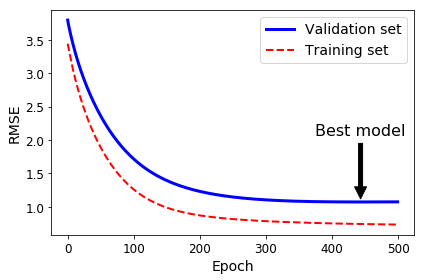

In [96]:
# Start the learning: 
n_epochs = 500
train_errors, val_errors = [], []

for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(
        y_train_predict, y_train))
    val_errors.append(mean_squared_error(
        y_val_predict, y_val))

# Checking where to stop by checking the epoch number
# on which the validation error was minimum.
best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black',
                             shrink=0.05),
             fontsize=16,
            )

# best_val_rmse -= 0.03  # just to make the graph look better
# plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
save_fig("early_stopping_plot")
plt.show()


### Classification: 

- The classification problem is just like the regression problem, except that the values we want to predict take on only a small number of discrete values. 
For now, we will focus on the __binary classification problem__ in which y can take on only two values, 0 and 1. 

- For eg: If we are trying to build a spam classifier, then $x^i$ may be some features of a piece of email and $y$ may be 1 if its a piece of spam mail and 0 if otherwise. 
- Hence, y belongs to (0,1). 
- 0 is callled the negative class (absence of something)
- 1 is called the positive class (precense of something)


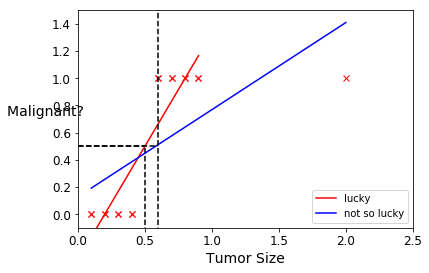

In [97]:
y = np.array([0,0,0,0,1,1,1,1])
x = np.array([0.1,0.2,0.3,0.4,0.6,0.7,0.8,0.9]).reshape(8,1)
plt.plot(x,y, "rx")
plt.xlabel("Tumor Size")
plt.ylabel("Malignant? ", rotation = 0)

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x,y)
y_pred = lin_reg.predict(x)
plt.plot(x,y_pred, "r-", label = "lucky")
plt.plot([0.5, 0.5], [-0.2, 0.5], 'k--')
plt.plot([0,0.5],[0.5, 0.5], "k--")

y = np.array([0,0,0,0,1,1,1,1, 1])
x = np.array([0.1,0.2,0.3,0.4,0.6,0.7,0.8,0.9, 2]).reshape(9,1)
plt.plot(x,y, "rx")
lin_reg = LinearRegression()
lin_reg.fit(x,y)
y_pred = lin_reg.predict(x)
plt.plot(x,y_pred, "b-", label = "not so lucky")
plt.plot([0.6, 0.6], [-0.2, 1.5], 'k--')
plt.plot([0,0.6],[0.5, 0.5], "k--")
plt.axis([0,2.5,-0.1,1.5])
plt.legend()

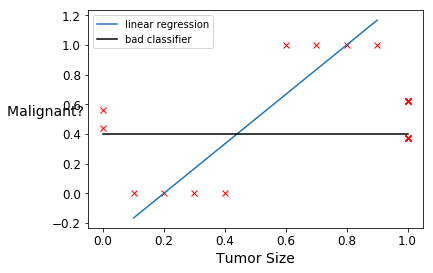

In [98]:
y = np.array([0,0,0,0,1,1,1,1])
x = np.array([0.1,0.2,0.3,0.4,0.6,0.7,0.8,0.9]).reshape(8,1)
plt.plot(x,y, "rx")
plt.xlabel("Tumor Size")
plt.ylabel("Malignant? ", rotation = 0)

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(x,y)
y_pred = lin_reg.predict(x)
plt.plot(x,y_pred, label = "linear regression")

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 42)
log_reg.fit(x,y)
y_proba = log_reg.predict_proba(x)
decision_boundary = x[y_proba[: , 1] >= 0.5][0]
plt.plot([0, 1],[decision_boundary, decision_boundary], 
         color = "k", label = "bad classifier")

x_new = np.ceil(np.linspace(0.0, 1, 8))
x_new = x_new.reshape(8,1)
y_pred = log_reg.predict_proba(x_new)
plt.plot(x_new, y_pred, "rx")
plt.legend()

## Logistic Regression:   

- Logistic Regression (also called _Logit Regression_ ) is commonly used to estimate the probability than an instance belowngs to a particular class. (eg: What is the probability that this email is a spam?). 
- If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class ( called positive class, labelled "1"), or else it predicts that it does not (i.e, it longs to the negative class, labeled "0"). This is a binary classifier.

### Hypothesis Representation: 
- We want a hypothesis that outputs between 0 and 1. 
- # $ h_{\theta}(x) = g(\theta^T.X) $
    - # $ g(z) = \frac{1}{1 + e^{-z}} $
    
__Interpretation of Hypothesis Output:__
- $ h_{\theta}(x)$ = estimated probability that y = 1 on input x.
- For example: ```x = [x_0 , x_1] = [1, TumorSize]```
    - Given a parameter vector $\theta$, if we calculate:
    - $h{_\theta}(x) = 0.7$ , we will interepret this as the following: 
        - There is 70% chance of class y = 1.
        - or there is 70% chance of the tumor being malignant. 
    - # $h{_\theta}(x) = p(y = 1 | x ; \theta) $ 
    - # $p(y = 0 | x ; \theta) = 1 -  h{_\theta}(x) $ or  $ p(y = 0 | x ; \theta) = 1 - p(y = 1 | x ; \theta)$

### Estimated Probabilities: 
- Just like linear regression, a Logitic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the _logistic_ of this result. 

- __Logistic Regression model estimated probability (vectorized form.__
# $\hat{p} = h_{\theta}(X) = \sigma(\theta^T.X) $
- The logistic - also called _logit_ , noted $\sigma(.)$ is a _sigmoid function_ (i.e S-shaped) that outputs a number between 0 and 1. 
- It is defined as:
    - # $\sigma(t) = \frac{1}{1 + e^{-t}} $

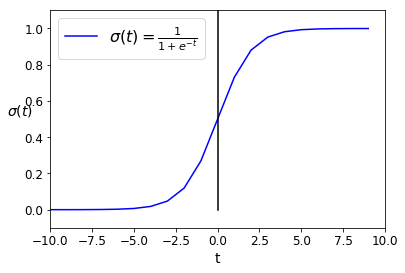

In [99]:
t = np.arange(-10,10,1)
plt.plot(t, 1/(1 + np.exp(-t)),color = "b", 
         label = r"$\sigma(t) = \frac{1}{1 + e^{-t}} $" )
plt.plot([0,0],[0,1.1], color = "k")
plt.axis([-10, 10, -0.1, 1.1])
plt.xlabel("t")
plt.ylabel("$\sigma(t)$", rotation = 0)
plt.legend(loc = "upper left", fontsize = 16)

# __DOUBT__: Why do we assume the output of the logistic to be a probability that x_i  belongs to the positive class? 
- COME BACK TO THIS. POST ON FORUMS ONCE YOU HAVE TRIED ENOUGH. DON'T LET THIS GO.
- For now, just think of the logistic regression mapping decision scores to probabilities that x belongs to class y = 1. 
- With gradient descent the parameters of logistic regression get trained such that if the real class is y = 1, then the decision score $\theta^T.X >= 0$ so that $\sigma(\theta^T.X) >= 0.5$
- With gradient descent the parameters of logistic regression get trained such that if the real class is y = 0, then the decision score $\theta^T.X < 0$ so that $\sigma(\theta^T.X) < 0.5$

__Latent Variable Model__: 
Letent means, something that exists, but not yet manifested. It's hidden/ concealed. 
- As researchers, we try to measure our constructs as best as we can. Often we can see and measure the shadowns of the constructs = the "objects" of our inquiry - but we caa't directly observe or measure the constructs themselves. 
- So we infer these constructs, which are unobserved, hidden or _latent_ from the data we collect on related variables we can observe and directly measure. 

Latent variables are variables that you cannot measure directly but are ultimately being used for answering questions. 
For eg: Measureable features maybe square footage and number of rooms, but the latent variable will be the size of the house. 
- __[Probability Density Function](https://www.youtube.com/watch?v=OWSOhpS00_s): __

- __[Normal Distribution / Gaussian Distribution](https://www.youtube.com/watch?v=iYiOVISWXS4)__: 
    - Distribution is symmetric about mean, median, mode. 
    - 68% of the area/ data points lie within 1 standard deviation from the mean. 
    - 95% of the area/data points lie within 2 standard devaitions from the mean.
    - 97% of the area/data points lie within 3 standard deviation from the mean. 
    - X ~ N (µ, $\sigma^2$)
    - We can have different normal distribution for different values of mean µ and $\sigma^2$. 
    - The Standard Normal Distribution is a normal distribution with mean 0 and variance 1. 
    - Probabilities are just areas under the curve. 
    - This required integrating the PDF.
   
- Difference between CDF and PDF: 
    - A PDF answers the question: "How common are the samples at exactly this value?" 
    - A CDF answers the question: "How common are the samples that are less or rqual to this vale?" 
    - The CDF is the integral of the PDF. Therefore, in order to find the probability at a certain point x, you can either integrate the PDF and calculate its value at x. Or, just input x in the CDF. 
    
__[Logistic Distribution](http://www.statisticshowto.com/logistic-distribution/):__ 
- In probability theory, the logistic distribution is a continuous probability distribution.
- Its a cumulative distrbition function, which appears in logistic regreesion and feedforward neural netwroks. 
- It is symmetrical, unimodal, and is similar to the shape of the normal distribution. 
- In fact, the logistic and normal distributions are so close in  shape (altough the logistic tens to have silghtly fatter tails) that for most applications, it impossible to tell them apart. 
- The logistic distribution has a easier CDF compared to the CDF of the normal distribution. 
    -$  F(x ; µ, s) = \frac{1}{1 + e^{x - µ}/s} $
- Two parameters define the shape of the distribution: 
    - The location parameter (µ) tels us where it's centered on the x-axis. 
    - The scale parameter $\sigma$ tells you what the spread is.  In the above equation, s is a scale parameter is proportional to the to the standard deviation


__[Why do we interpret the results of logistic regression as probabilities?](https://stats.stackexchange.com/questions/117040/probabilistic-interpretation-from-sigmoid-functions)__ 
- Because the logestic regression model can be viewed as arising from a linear regression __latent variable model__ where the error term of this linear regression is assumed to follow the standard __logistic distribution__. 
__given that the outpur must is between 0 and 1, is it enough to interpret is as a probabilities?__
- No, the "output" must come from a function that satisfies the [properties of distribution function](https://www.youtube.com/watch?v=FM7_mKEHuJI) in order for us to interpret it as probabilities. 
- The "sigmoid/logistic" function does satisfy these properties. 

    



# DOUBT: __Why do we not use Linear Regression for Classification Algorithm? __ 

0.5

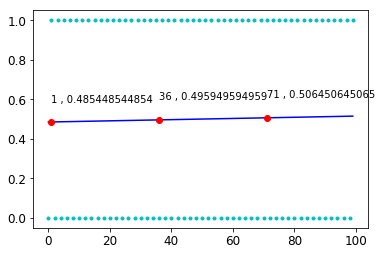

In [100]:
# Labeled 1 for odd, and 0 for even
x = np.arange(0,100,1).reshape(100,1)
y = np.array([0,1]*50)


lin_reg = LinearRegression()
lin_reg.fit(x,y)
pred_y = lin_reg.predict(x)
pred_y

plt.plot(x,y, "c.")
plt.plot(x,pred_y, "b-")

for index in range(1,100,35):
    plt.text(x[index] ,pred_y[index] + 0.1, str(x[index][0])+" , "+str(pred_y[index]))
    plt.plot(x[index], pred_y[index], "ro")

pred_y

for value in pred_y:
    if value < 0 or value > 1:
        print(value)
# >> Outputs None
# >> DOUBT: Then why did andrew ng say that linear regression can 
# output values greater than 1 or less than 0? 

# Checking accuracy setting Threshold @0.5
y_pred = pred_y > 0.5
y_pred = y_pred.astype(int)
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)
# >> 0.5

### Estimated Probabilities: 
- Just like linear regression, a Logitic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the _logistic_ of this result. 

- __Logistic Regression model estimated probability (vectorized form.__
# $\hat{p} = h_{\theta}(X) = \sigma(\theta^T.X) $
- The logistic - also called _logit_ , noted $\sigma(.)$ is a _sigmoid function_ (i.e S-shaped) that outputs a number between 0 and 1. 
- It is defined as:
    - # $\sigma(t) = \frac{1}{1 + e^{-t}} $
    
- Once the Logistic Regression model has estimated the probability $\hat{p} = h_{\theta}(x)$ that an instance x belongs to positive class, it can make prediction $\hat{y}$ very easily. 
- $ \hat{y} = 0, $ if $ \hat{p} < 0.5 $ 
- $ \hat{y} = 1 ,$ if $\hat{p} >= 0.5 $  

### Training and Cost Function: 
Good, now you know how a Logistic Regression model estimates probabilities and makes predictions. 
But how is it trained ? 
- The objective of training is to set the parameter vector $\theta$ so that the model estimates high probabilities for positive instance (y = 1) and low probabilities for negative instance (y = 0). This idea is captured by the cost function: 

Now, how do we choose $\theta$? 

- __Recall that for Linear Regression__:
    - # $J(\theta) \frac{1}{m}\sum_{i=1}^m \frac{1}{2}(h_{\theta}x^i - y^i)^2 $ 
    
    - This basically finds the squared error over a training instances.
    - multiplied that by 1/2
    - does the above 2 steps for all the training instances.
    - sums all the half squared errors for each instance
    - and takes the average of the sum   
    
__Interpretation of the cost function__: We want our learning algorithm to pay this much cost if it ourpurs $h_\theta(x)^i$ instead of $y^i$. 

__ Describe why gradient descent can find a global minimum with a convex loss function __
- Side Note: A convex function is one for which you can draw a line between any two points on the graph, and the line will be above the graph, [never below it](https://image.slidesharecdn.com/dtuphd12-120919100037-phpapp02/95/convex-optimization-old-tricks-for-new-problems-24-728.jpg?cb=1348048958). Convex functions are useful as they have only one global minimum, no local minimums. This means that gradient descent will be able to converge and find the best solution. 

- The above MSE worked fine for linear regression, but not for logistic regression. If we use MSE for logistic regression, we will get a __non-convex__ cost function of the parameter $\theta$.     
- This means that using MSE for logistic regression will lead to having a lot of local minimum. 

- __ DOUBT: Why is MSE for logistic regression a non-convex function? __ 
    - `Convexity Analysis`
    - For now, just think it like this: We needed a convex optimisation problem, in order to use gradient descent and finf the parameters for logisitic regression. Parameters such that if y = 1, then $\theta^T.X$ is large, and when y = 0, then $\theta^T.X$ is small. 
    - In other words, we needed a convex optimiation problem to use gradient descent on and find the parameters for logisitc regression that estimate high probabilities for instances where y = 1, and low probabilities for instances where y =0.  
    
 

__Therefore, we need a new convex cost function for Logistic Regression__ : 

- __Cost Function for Log Reg for a single training instance $x_i$ : __
- # $ C(\theta) = -log(\hat{p}), if y = 1 $   

- # $ C(\theta) = -log(1 - \hat{p}), if y = 0 $
- Why does this make sense? 

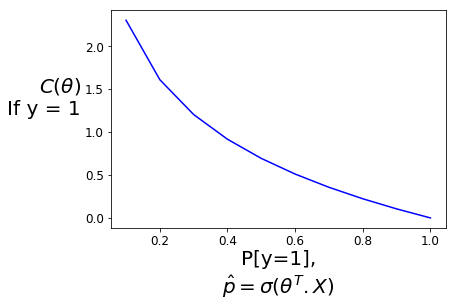

In [101]:
### For y = 1: 
x = np.linspace(0.1,1,10)
plt.plot(x, -np.log(x), "b-")
plt.xlabel("P[y=1],\n"+r"$\hat{p} = \sigma(\theta^T.X)$",
          fontsize = 20)
plt.ylabel(r"$C(\theta)$"+"\nIf y = 1", rotation = 0,
           ha = "right", fontsize = 20)


- __As we see, if $ y = 1 $, the cost is very low / 0 as $\hat{p}$ tends to 1.0__
- __The cost increases as $\hat{p}$ tends to 0.0__


//anaconda/envs/dlndf/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


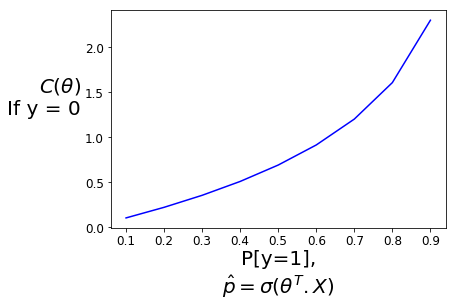

In [102]:
# For y = 0:
x = np.linspace(0.1,1,10)
plt.plot(x, -np.log(1 - x), "b-")
plt.xlabel("P[y=1],\n"+r"$\hat{p} = \sigma(\theta^T.X)$",
          fontsize = 20)
plt.ylabel(r"$C(\theta)$"+"\nIf y = 0", rotation = 0,
           ha = "right", fontsize = 20)


- __As we see, if $ y = 0 $, the cost is very low / 0 as $\hat{p}$ tends to 0.0__
- __The cost increases as $\hat{p}$ tends to 1.0__

- __Therefore, the cost according to this function will be very large if__:
    - the model estimates a P[y=1] close to 0 for a postive instance (y = 1) ,
    - and it will also be very large if it estimates a P[y=1] close to 1 for negative instance (y = 0)  
    
- __ On the other hand, the cost according to this function will be very low if__: 
    - The model estimates a P[y=1] close to 1 for a positive instance (y = 1).
    - The mode estimates a P[y=0] close to 0 for a negative instance (y = 0). 

- The cost function over the whole training set is simple the average cost over all the training instances. It can be written in a single expression ( as you can verify easily) called the _log loss_ function.    

__DOUBT: Why do we use the _log_loss function?__   

TODO: READ Principle of Maximum Likelihood Estimation, Log loss function  , gives a deeper explanation and justification for the choise of this function. 

### $ J(\theta) = - \frac{1}{m}\sum_{i=1}^m [y(i)log(\hat{p}^i) + (1 - y)log(1 - \hat{p}^i)] $ 


## If all y = 0: 
### __$ J(\theta) = - \frac{1}{m}\sum_{i=1}^m [log(1 - \hat{p}^i)] $ __

## If all  y = 1: 
### __$ J(\theta) = - \frac{1}{m}\sum_{i=1}^m [log(\hat{p}^i)] $ __  

- ### Aim:  To find our parameter vectors $\theta$ which minimise $J(\theta)$. 
- ### Then, given a new feature vector $x_i$, we are able to fit it to our parameter vector:
    - ### Calculate $\theta^T.x_i$
    - ### Find $h_\theta(x)_i) = \frac{1}{1 + e^{-\theta^T.x_i}}$ , which is gives us a probability $\hat{p}$ , P[y=1]. 
    - ### Then, according to the probability and threshold set, we can predict whether y = 1 or y = 0. 

- Bad News: There is no closed form equation to compute the value of $\theta$ that minimizes this cost function. (There is no equicvalent of the Normal Equation). 
- But the good news is that this cost function is convex, so Gradient Descent (or any other optimisation algorithm) is guaranteed to find the global minimum ( if the learning rate is too large and you wait long enough). 
- The [partial derivatives of the cost function](https://math.stackexchange.com/questions/477207/derivative-of-cost-function-for-logistic-regression) with regards to the $j^{th}$ mode parameter $\theta_j$ is given by: 

- # $ \frac{\partial}{\partial \theta_j}J(\theta) = \frac{1}{m}\sum_{i=1}^m (\sigma(\theta^T.x^i) - y^i).x_j^i $
- This equation for the partial derivative of the cost function  looks an awful lot like the one we had for Linear Regression: 
    - ## $\dfrac{\partial}{\partial \theta_j} \text{MSE}(\mathbf{\theta}) = \dfrac{2}{m}\sum\limits_{i=1}^{m}(\mathbf{\theta}^T \cdot \mathbf{x}^{(i)} - y^{(i)})\, x_j^{(i)}$
- The partial derivative of the _log loss_ function looks an awful lot like the partial derivate of the _MSE_ function, with respect to parameter vector $\theta_j$.


__Gradient Descent Updata Rule for Logistic Regression:__


## $ \theta_j := \theta_j - \alpha * \frac{\partial}{\partial \theta_j}J(\theta) $

## Repeat {
## $ \theta_j := \theta_j - \alpha *  \frac{1}{m}\sum_{i=1}^m (\sigma(\theta^T.x^i) - y^i).x_j^i $
###                  (simulataneously update all $\theta_j$)
## } 

- __The only difference__ between the gradient descent update rule is that update rule is the definition of $h\theta(x)$, our model/hypothesis function. 
- Previously in linear regression, our prediction function was $\theta^T.X$
- Now, we predict using a probability we get from $ \frac{1}{1 + e^{-\theta^T.X}}$ 

- Batch Gradient Descent for involves the following weight change for each weight_`j`: 
    - For each instance, 
        - compute the prediction error 
        - multiply it by the $j^{th}$ feature value where j is the weight you are updating 
        - sum up prediction $\times$ $x_j^i$ for each instance
    - compute the average over all the training set. 
    - multiply this average by the learning rate alpha.
    - This will be the weight step, subtract it from the current weight_j.    

- Once you have the gradient vector containing all the partial derivatives, you can use batch gradient descent algorithm. (Simulataneously updating all the parameters, using the average weight change calculated on the entire training set)
- For Stochastic GD , you would ofcourse just take one instance at a time (simulataneously update all weights using weight change calculated by 1 training instance)
- For mini-bath GD, you would use a mini-batch at a time. (simulataneously updata all weights using the average weight change calculated on the mini-batch). 

### Importantance of Feature Scaling in Logistic Regression:
- The same logic applied for Logistic Regression. If the features are not scaled well, we might get narrow contour plots. 
- Feature scaling helps gradient descenty to converge must faster. 


### Vectorized Implementsation of Gradient Descent: 

According to code:
- # In the code: 
    - Now, $\theta$ is a __row vector__ ($ 1 \times n + 1$). 
    - Now, $\theta^T$ is a __column vector__ ($ n + 1 \times 1)$). 
    - $x_i$ is a __column_vector__ (($ n+1 \times 1$))
    -  __`X_b`__ is a (($ m \times n + 1$)) matrix, where each row refers to 1 instance's features. 
    - Therefore, __X_b$^T$__ is a (($ n + 1 \times m$))matrix. 
    - $y$ is a $ m \times 1$ column vector
## $ \theta := \theta - \frac{\alpha}{m}X^T(g(X\theta^T - \vec{y})$

### Decision Boundary: 

In order to get our descrete 0 or 1 classification, we can translate the output function as follows: 
### $h{_\theta}(x) >= 0.5 --> y = 1 $
### $h{_\theta}(x) < 0.5 --> y = 0 $ 

- The way our logistic function g behaves is that when its input is greater than or equal to 0, its output if greater than or equal to 0.5:  

- ### $g(z) >= 0.5$, when $z >= 0$
    - Why? Cause when:
        - z = 0 , 
        - e^0 = 1, 
        - therefore 1 / 1 + 1 = 1/2 = 0.5 
    - As z --> $\infty$ 
    - $e^{-\infty} --> 0$,
    - therefore g(z) = 1 / 1 +0 = 1

- Similarly when z < 0, g(z) < 0.5.
    - Why ? :
        - cause as z --> $- \infty$ 
        - $e^{+\infty} --> \infty$, 
        - therefore g(z) = 1 / 1 + $\infty$ = 0
    
- Therefore , if our linear combination of inputs and parameter vector: $\theta^T.X$ >= 0, then y = 1.  
- Otherwise, if $\theta^T.X$ < 0, then y = 0.

- The __decision boundary__ is the line that seperates the area where y =0 and where y = 1. It is created by our hypothesis function.  

- By adding more polynomial terms to your features, you can use more complex decision boundaries other than a simple line. 

- This means that the input to the sigmoid function g(z) (eg: $\theta^T.X$) does not need to be linear, and could be a function that describes a circle. ( eg: z = $\theta_0 + \theta_1x_1^2 + \theta_2x_2^2 $ )

- The decision boundary is a property of the hypothesis function parameterized by $\theta$. This means that the hypothesis function and parameters decide the decision boundary, and not the training set. 
    - But the training set does affect the parameters. 
    - The training set is not used for making the decision boundary. The training set is only used to fit the parameters, which in turn define the training set.  

- Lets use the iris dataset to illustrate Logistic Regression. 
- This is a famous datasaset that contains the sepal and petal length and width of 150 iris flowers of three different species: 
    - Iris-Setosa
    - Iris-Versicolor
    - Iris-Virginica
- Lets try to build a classifier to detect the Iris-Virginica type based only on the petal width feature. 

In [103]:
from sklearn import datasets

iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names']

In [104]:
pd.DataFrame(iris["data"], columns = iris["feature_names"]).head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [105]:
iris["target_names"]

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

In [106]:
pd.DataFrame(iris["target"])

,0
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


__Extracting only the petal width feature:__

In [107]:
X = iris["data"][:, 3:] # petal width array
y = (iris["target"] == 2).astype(np.int)
# 1 if virginica, 0 if any of the other 2. 
X.shape, y.shape

((150, 1), (150,))

- __Training a Logistic Regression Model with [`sklearn.linear_model.LogisticRegression`](http://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)__

In [108]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X,y)
#>> Runs gradient descent, finds the parameters of the 
# model. 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

__Checking the coefficient of the features__
- There is only one feature here, therefore, there will be only one weight for it. 
- `coef_` is of shape `(1, n_features)` is binary problem.
- `coef` is of shape `(n_classes, n_features)` when multinomial regression. There will a different weight of each feature-class combination. 


In [109]:
log_reg.coef_

array([[ 2.61727777]])

__Intercept (aka bias) added to the decision function__ 

In [110]:
log_reg.intercept_

array([-4.2209364])

__Here we confirm that the Virginica flowers range from 1.4 to 2.5 cm, while the other iris flowers generally have smaller petal width (ranging from 0.1 to 1.8 cm). 

In [111]:
np.sort(np.c_[X,y], axis = 0)

array([[ 0.1,  0. ],
       [ 0.1,  0. ],
       [ 0.1,  0. ],
       [ 0.1,  0. ],
       [ 0.1,  0. ],
       [ 0.1,  0. ],
       [ 0.2,  0. ],
       [ 0.2,  0. ],
       [ 0.2,  0. ],
       [ 0.2,  0. ],
       [ 0.2,  0. ],
       [ 0.2,  0. ],
       [ 0.2,  0. ],
       [ 0.2,  0. ],
       [ 0.2,  0. ],
       [ 0.2,  0. ],
       [ 0.2,  0. ],
       [ 0.2,  0. ],
       [ 0.2,  0. ],
       [ 0.2,  0. ],
       [ 0.2,  0. ],
       [ 0.2,  0. ],
       [ 0.2,  0. ],
       [ 0.2,  0. ],
       [ 0.2,  0. ],
       [ 0.2,  0. ],
       [ 0.2,  0. ],
       [ 0.2,  0. ],
       [ 0.2,  0. ],
       [ 0.2,  0. ],
       [ 0.2,  0. ],
       [ 0.2,  0. ],
       [ 0.2,  0. ],
       [ 0.2,  0. ],
       [ 0.3,  0. ],
       [ 0.3,  0. ],
       [ 0.3,  0. ],
       [ 0.3,  0. ],
       [ 0.3,  0. ],
       [ 0.3,  0. ],
       [ 0.3,  0. ],
       [ 0.4,  0. ],
       [ 0.4,  0. ],
       [ 0.4,  0. ],
       [ 0.4,  0. ],
       [ 0.4,  0. ],
       [ 0.4,  0. ],
       [ 0.4,

In [112]:
for index in range(len(X)):
    if X[index] >= 1.7 and y[index] == 0:
        print(X[index])
        print(index)

[ 1.8]
70
[ 1.7]
77


In [113]:
X[70], y[70], X[77], y[77]

(array([ 1.8]), 0, array([ 1.7]), 0)

__There are only 2 flowers who have a a petal width 1.7 and still are not Virginica Flowers. __  
__Conclusion: Virginica FLowers have a bigger petal width as compared to other flowers. __

In [114]:
X_new = np.linspace(0,3,1000).reshape(1000,1)
y_proba = log_reg.predict_proba(X_new)
print(pd.DataFrame(np.c_[X_new,y_proba], columns = ["Sample Petal Width", 
                                       "P[y = 0]", "P[y = 1]"]
                  ).head())

pd.DataFrame(np.c_[X_new, y_proba], columns = ["Sample Petal Width",
                                               "P[y = 0]", "P[y = 1]"]
            ).tail()


   Sample Petal Width  P[y = 0]  P[y = 1]
0            0.000000  0.985528  0.014472
1            0.003003  0.985415  0.014585
2            0.006006  0.985302  0.014698
3            0.009009  0.985187  0.014813
4            0.012012  0.985072  0.014928


,Sample Petal Width,P[y = 0],P[y = 1]
995,2.987988,0.026611,0.973389
996,2.990991,0.026408,0.973592
997,2.993994,0.026207,0.973793
998,2.996997,0.026007,0.973993
999,3.000000,0.025809,0.974191


__ Notice that the P[y=1] with low petal width in X_new is very low. But as the petal width increases , the P[y=1] also increases. This is because Virginica Flowers have a minimum of 1.4 cm petal width, and the logistic regression classifier has understood this. __

### How to plot the decision boundary: 
- The decision boundary should exist at the place where beyond it, the probability that y = 1 is beyond a threshold. 
- For eg: If beyond a petal width , the probability that the flower is Virginica is above 0.5, we would take that point as the decision boundary. 


__Looking at the model's expected probabilities for flowers with petal widths varying from 0 to 3 cm__:

In [115]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
# >> Retruns the probability estimates from the sigmoid 
# function

decision_boundary_point = X_new[y_proba[:, 1] >= 0.5][0]

# Indexing all the petal_widths whose probability of being
# Virginica is >= 0.5. 
# Indexing the first value from indexed X_new. 
decision_boundary_point

array([ 1.61561562])

Saving figure:  logistic_regression_plot


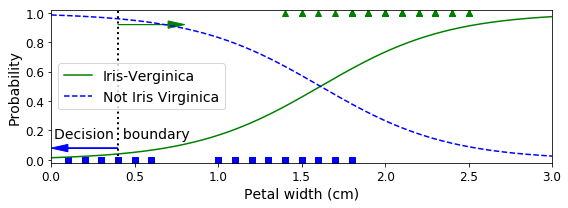

In [116]:
plt.figure(figsize=(8, 3))

# Plotting the DataSet, PetalWidth and 0/1 class. 
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")


# Plotting p[y=1], given X_new
plt.plot(X_new, y_proba[:,1], "g-", 
         label = "Iris-Verginica"
        )
# >> This will look like the sigmoid function because 
# it is actually the sigmoid function. 

# Plotting p[y=0], given X_new
plt.plot(X_new, y_proba[:, 0], 'b--',
         label = "Not Iris Virginica")

# Plotting the decision boundary
plt.plot([decision_boundary, decision_boundary],
         [-1, 2], "k:", linewidth=2)

# Making it Pretty
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
save_fig("logistic_regression_plot")
plt.show()

- The petal width of Iris - Virginica flowers (represented as triangles) ranges from 1.4 to 2.5, while the other iris flowere (represented by squares) generally have a smaller petal width, ranging from 0.1 to 1.8 cm. 

- Notice that there is a bit of an overlap.
    - Above 2cm the classifier is highly confident that the flower is an Iris-Virginica (it outputs a high probability to that class), while below 1cm, it is highly confident that it is not ("high probability for the "Not Iris-Virginica class) 
    - However, if you ask it to predict, using the `predict()` method, it will return the class which is most likely. 
    - Therefore, there is a decision boundary at 1.6cm, where both the probabilities are 0.5 or 50%. 


In [117]:
log_reg.predict([[1.7],[1.5]])

array([1, 0])

The following code shows the same datset but this time diplaying two features instead of 1. 
Once trained on the 2 features, the Logistic Regression Classifier can estimate the probability that a new flower is an Iris-Virginica based on the two features. 

In [118]:
X = iris["data"][:,2:]
# Only petal length and petal width

In [119]:
y 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [120]:
X.shape, y.shape

((150, 2), (150,))

### Vectorized Implementsation of Gradient Descent: 

According to code:
- # In the code: 
    - Now, $\theta$ is a __row vector__ ($ 1 \times n + 1$). 
    - Now, $\theta^T$ is a __column vector__ ($ n + 1 \times 1)$). 
    - $x_i$ is a __column_vector__ (($ n+1 \times 1$))
    -  __`X_b`__ is a (($ m \times n + 1$)) matrix, where each row refers to 1 instance's features. 
    - Therefore, __X_b$^T$__ is a (($ n + 1 \times m$))matrix. 
    - $y$ is a $ m \times 1$ column vector
## $ \theta := \theta - \frac{\alpha}{m}X^T(g(X\theta^T) - \vec{y})$

In [121]:
np.random.seed(42)
param_vec = np.random.randn(3,1)
param_vec

array([[ 0.49671415],
       [-0.1382643 ],
       [ 0.64768854]])

In [122]:
X_b = np.c_[np.zeros(len(X)), X]
X_b

array([[ 0. ,  1.4,  0.2],
       [ 0. ,  1.4,  0.2],
       [ 0. ,  1.3,  0.2],
       [ 0. ,  1.5,  0.2],
       [ 0. ,  1.4,  0.2],
       [ 0. ,  1.7,  0.4],
       [ 0. ,  1.4,  0.3],
       [ 0. ,  1.5,  0.2],
       [ 0. ,  1.4,  0.2],
       [ 0. ,  1.5,  0.1],
       [ 0. ,  1.5,  0.2],
       [ 0. ,  1.6,  0.2],
       [ 0. ,  1.4,  0.1],
       [ 0. ,  1.1,  0.1],
       [ 0. ,  1.2,  0.2],
       [ 0. ,  1.5,  0.4],
       [ 0. ,  1.3,  0.4],
       [ 0. ,  1.4,  0.3],
       [ 0. ,  1.7,  0.3],
       [ 0. ,  1.5,  0.3],
       [ 0. ,  1.7,  0.2],
       [ 0. ,  1.5,  0.4],
       [ 0. ,  1. ,  0.2],
       [ 0. ,  1.7,  0.5],
       [ 0. ,  1.9,  0.2],
       [ 0. ,  1.6,  0.2],
       [ 0. ,  1.6,  0.4],
       [ 0. ,  1.5,  0.2],
       [ 0. ,  1.4,  0.2],
       [ 0. ,  1.6,  0.2],
       [ 0. ,  1.6,  0.2],
       [ 0. ,  1.5,  0.4],
       [ 0. ,  1.5,  0.1],
       [ 0. ,  1.4,  0.2],
       [ 0. ,  1.5,  0.1],
       [ 0. ,  1.2,  0.2],
       [ 0. ,  1.3,  0.2],
 

In [123]:
y = y.reshape(-1,1)

In [124]:
X_b.shape, param_vec.shape, y.shape, X_b.T.shape

((150, 3), (3, 1), (150, 1), (3, 150))

# Trying to Predict With Random parameter vector: 

In [125]:
def sigmoid(x): 
    return 1/(1 + np.exp(-x))

y_pred = (sigmoid(X_b.dot(param_vec)) >= 0.5).astype(int)
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.57999999999999996

In [126]:
iterations = 1000
m = len(X)
error_list = []
eta = 0.001 

for i in range(iterations):
    prediction = sigmoid(X_b.dot(param_vec) )
    error = prediction - y
    error_list.append(error.mean())
    weight_update = X_b.T.dot(error)
    param_vec = param_vec - (eta/m)*weight_update

print(param_vec)

[[ 0.49671415]
 [-0.23300936]
 [ 0.69058098]]


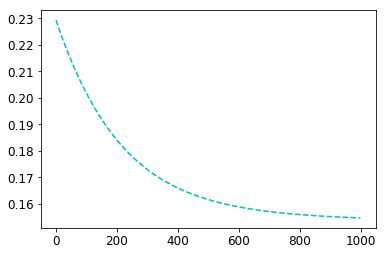

In [127]:
plt.plot(list(range(iterations)), error_list, "c--")

In [128]:
y_pred = (sigmoid(X_b.dot(param_vec)) >= 0.5).astype(int)
from sklearn.metrics import accuracy_score
accuracy_score(y, y_pred)

0.83333333333333337

# From 58% accuracy, we have now come to 84% accuracy. 

In [129]:
X_b[:,1].min(), X_b[:,1].max(), X_b[:,2].min(), X_b[:,2].max()
# Minm Max Petal Length, Min Max Petal Width

(1.0, 6.9000000000000004, 0.10000000000000001, 2.5)

# Using Sklearn `LogisticRegression`: 

In [130]:
log_reg = LogisticRegression(random_state = 42)
log_reg.fit(X_b, y.ravel())
# >> Fitting and running gradient descent. 

y_proba = log_reg.predict_proba(X_b)
# >> Finding the sigmoif probabilities.

y_pred_new = (y_proba[:,1] >= 0.5).astype(int)
accuracy_score(y, y_pred_new)

0.96666666666666667

# Sklearn's Logistic Regression got a better accuracy score. 


# What has been done in the book:
> ### Binary Classification with multiple features: 

In [131]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:,2:] # petal length, petal width
pd.DataFrame(X, columns = ["Petal Length", "Petal Width"]).describe()


,Petal Length,Petal Width
count,150.000000,150.000000
mean,3.758667,1.198667
std,1.764420,0.763161
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


In [132]:
y = (iris["target"] == 2).astype(int)

log_reg = LogisticRegression(C = 10**10, random_state = 42)
# >> C here refers to inverse of regularization strength,
# The higher C, the less regularization happens.
log_reg

LogisticRegression(C=10000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [133]:
log_reg.fit(X,y)

LogisticRegression(C=10000000000, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=42,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [134]:
x_0, x_1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x_0.ravel(), x_1.ravel()]
X_new.shape
# >> (100000, 2)
y_proba = log_reg.predict_proba(X_new)
y_proba.shape
# >> 

(100000, 2)

In [135]:
# x_0 = np.linspace(1,7,10000)
# x_1 = np.linspace(0.1, 2.5, 10000)
# X_new = np.c_[x_0, x_1]
# X_new.shape
# # >> (10000, 2)
# y_proba = log_reg.predict_proba(X_new)
# y_proba.shape

In [136]:
X[y==0][:,0] # column 0/ Petal Length of X (flowers)
# where label is 0 (Not Target Class). 

array([ 1.4,  1.4,  1.3,  1.5,  1.4,  1.7,  1.4,  1.5,  1.4,  1.5,  1.5,
        1.6,  1.4,  1.1,  1.2,  1.5,  1.3,  1.4,  1.7,  1.5,  1.7,  1.5,
        1. ,  1.7,  1.9,  1.6,  1.6,  1.5,  1.4,  1.6,  1.6,  1.5,  1.5,
        1.4,  1.5,  1.2,  1.3,  1.5,  1.3,  1.5,  1.3,  1.3,  1.3,  1.6,
        1.9,  1.4,  1.6,  1.4,  1.5,  1.4,  4.7,  4.5,  4.9,  4. ,  4.6,
        4.5,  4.7,  3.3,  4.6,  3.9,  3.5,  4.2,  4. ,  4.7,  3.6,  4.4,
        4.5,  4.1,  4.5,  3.9,  4.8,  4. ,  4.9,  4.7,  4.3,  4.4,  4.8,
        5. ,  4.5,  3.5,  3.8,  3.7,  3.9,  5.1,  4.5,  4.5,  4.7,  4.4,
        4.1,  4. ,  4.4,  4.6,  4. ,  3.3,  4.2,  4.2,  4.2,  4.3,  3. ,
        4.1])

[2.9, 7, 0.8, 2.7]

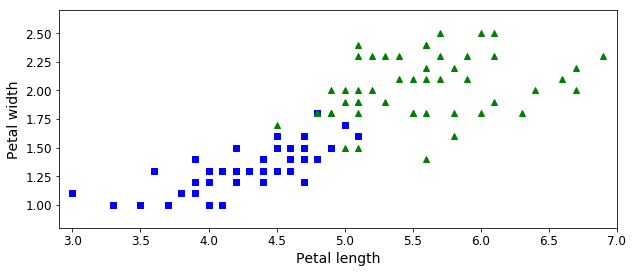

In [137]:
# Plotting the Data: 
plt.figure(figsize = (10,4))
plt.plot(X[y==0][:,0], X[y==0][:,1], "bs")
plt.plot(X[y==1][:,0], X[y==1][:,1], "g^")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

Saving figure:  logistic_regression_contour_plot


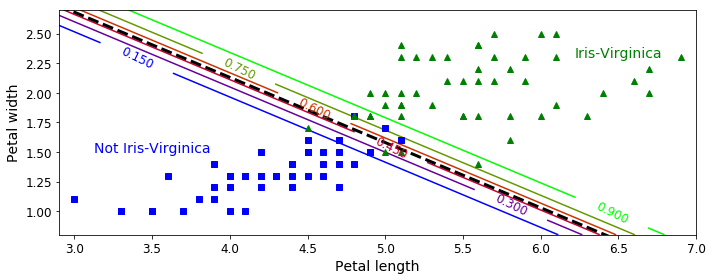

In [138]:
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x_0.shape)
contour = plt.contour(x_0, x_1, zz, cmap=plt.cm.brg)


left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
save_fig("logistic_regression_contour_plot")
plt.show()





__Interpretation:__   
- Once trained, the Logistic Regression Classifier can estimate the probability that a new flower is an Iris-Virginica based on the two features, Petal langth and Petal Width. 
- The dashed line represents where the model estimates a 50% probability: this is the model's decision boundary. 
- Note that it is a linear boundary. Each parallel line represnts the points where the model outputs a specific probability. 
- All the flowers in the top right have over a 90% chance of being Iris Virginica according to the model.   

DOUBT: DID NOT UNDERSTAND HOW CONTOURS AND DECISION BOUNDARY IS PLOTTED. 

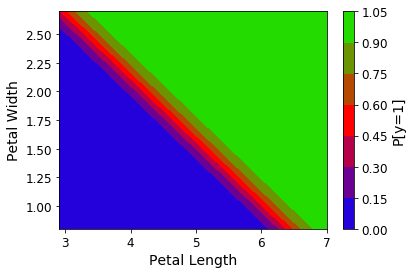

In [145]:
from mpl_toolkits.mplot3d import Axes3D
plt.contourf(x_0, x_1, zz, cmap= plt.cm.brg)
plt.colorbar(label = "P[y=1]")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")

## Softmax Regression:  

### Estimating Probabilities and Making Predictions: 
- The Logistic Regression Model can be generalised to support multiple classes directly, withou having to train and combine multiple binary classifiers. 
- This is called _Softmax Regression_, or _Multinomial Logistic Regression_. 
- The idea is quite simple. 
- Given an instance $x_i$, the Softmax Regrssion model first computes a score s_k(x) for each class _k_, then estimates the probability of each class by applying the _softmax function (also called normalized exponential)_ to the scores. 
- # $s_k(x) = (\theta^k)^T.x$ 
    - ### Note that each class has its own dedicated parameter vector (As each feature will have different importance for different classes). 
    - ### $\theta^k$, is the same order as $\theta$ used to be: i.e a row vector of order $1\times (n+1)$
    - ### Therefore, $\Theta$ will be a $k \times (n+1)$ _parameter matrix_ with each row having a parameter vector for different class. 
    - ### Therefore,$(\theta^k)^T$ will be a column vector of order $(n+1) \times 1$. 
    - ### The above formula says: 
        - #### The score of instance x, for class k is equal to :
            - #### The dot product of instance x with the corresponding parameter vector for class k. 


- Note that X is a $ m \times n+1 $ matrix. In order to find the scores of each instance, for each class, we will need a $m \times k$ matrix, with each row represening an instance, and each column representing the instance's score for the class k. 
    - DOUBT: How shall we get that? 
        - By taking the product of X$\Theta^T$
        - That is:
            - # $[m \times (n+1)].[(n+1) \times k]$
            - # $m \times k$ 
            - Worked it out on blackboard, taking the dot product of X with $\Theta^T$ does the following:
                - Multiplies each instance's features(row in X) with each class-parameter-vector(column in $\Theta^T$) .
                - For eg: multipliying row 1 of X , with column 1 parameter matrix gives the score of the first instance for the 1st class. That is, how likely is it that the 1st instance belongs to the first class.  
                
- This will give us a single number, a __score__. 
- Once you have got the score of every class for the instance x_i , you can estimate the probability $\hat{p_k}$ that instance belongs to class _k_ by running the scores through the softmax function. 
- What does the softmax function do? 
    - Computes the exponential of each score, then normalizes them (dividing by the sum of all the exponentials). 
    - #  $\hat{p_k} = \sigma{(S(x_i))_k} =  \frac{exp(S_k(x_i)}{\sum_{j=1}^k exp(S_j(x_i))}$
    - ### K is the number of classes.
     - ### S(x_i) is a vector containg the scores of each class for instance $x_i$. 
     - ### $ \sigma(S(x_i))_k $ is the estimated probability that the instance $ x_i$ belongs to class k given the scores of each class for the instance. 

DOUBT: Why take the exponential of each score, why not just find the probability by taking the score/sum of scores. 


Just like Logistic Regression Classifier, the Softmax Regression classifier predict the class with the highest estimated probability (which is simply the class with the highest score) 

## $\hat{y} = argmax \sigma(S(x_i))_k = argmax ((\theta^k)^T.x_i)$

- Note: The Softmax Regression Classifier predicts only one class at a time (i.e, it is a multiclass, not a multioutput classifier), so it should be used only with mutually exclusive classes such as different types of plants. 
- You cannot use it to recognise multiple people in a picture. 



### Training and Cost function for Softmax Regression: 
- Now that you know how the model estimates probabilities and makes predictions, lets take a look at __training__. 
- The objective of this model is to estime a high probability for the target class (and consequenty a low probability for the other classes.) 
- The objective of this model is to estime a high score for the target class (and consequenty a low score for the other classes.) 

#### Cross Entropy Cost Function: 
Cross Entropy is just like the log loss function, except it penalises the model only when it predicts a y = 1 as a y = 0.  In other words, it penalises the model when it recieves a low score/ low probability for the target class. 

DOUBT: Relationship between logloss function and Cross Entropy function
DOUBT: Why is the Cross Entropy only penalised when y=1 is predicted as y=0 and not when y =0 is predicted close to 1?

# $ -1/m \sum_{i=1}^m\sum_{k=1}^k y_k^ilog(\hat{p_k^i})  $ 
- Logic: If $ (\hat{p_k^i}) $ is 1, then $ - log 1$  is 0. - No Penalising the model as $y = 1$ and $(\hat{p_k^i} = 1$
- On the other hand If $ (\hat{p_k^i} $ tends to 1, then $ - log 0 ~ infty$. - High Penalisation of the model as $y = 1$ and $(\hat{p_k^i} )$ ~ $ 0$
- The cost is calculated for each class of an instance and summed over. The cost for the non-target class is not taken into account. 
- The cost of each instance in the training set is summed over. 
- The average of the cost is caculated.  

## Gradient Descent for $J(\Theta)$ 
- Previously, we used to conduct partial derivatives of the cost function with repect to each weight. 
- Here also, we will do just that. But all in all, we will focus on getting the parameter vectors for each class _k_ just right. The weight_j corresponding to a class/parameter vector should be in accordance with the importance of a feature in that class.
    - For eg: suppose the class 0 is for Humans. 
    - and feature 3 in the instance row vector $x_i$ corresponds to a binary value (Tail : Yes(1) or No(0)). 
    - Therefore, in the parameter vector for Humans, we will have a very low 3rd weight (A very low weight corresponding to feature of tails.) 
    - On the other hand, for the parameter vector belonging to class 1= lizards, we will have a huge 3rd weight (A very high weight corresponding to feature of tails). 
    - Now, for example, the instance vector $x_i$ has a 1 in the 3rd feature. 
        - This will make $(\theta^0)^T.x_i$ small. As it did not get the extra "points" for having a tail.
        - On the other hand $(\theta^1)^T.x_i$ will be big. As it gets the extra "points" for having a tail. 
        - This way, we will be able to confirm that since, the score (linear combination) for class 1 is higher than that of class 0, the instance is a lizard. 

## Using SoftmaxRegression to classify Iris Flowers into all three classes: 
[__`sklearn.linear_model.LogisticRegression`__](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- `LogisticRegression` uses one verus all by default when you train it on more than two classes, but you can set the `multi-class` hyperparameter to `multinomial` to switch it to SoftmaxRegression instead. 
- You must also specify a solver that supports Softmax Regression, such as `"lbfgs"`. 
- It also applied l2 regularization by default which you can control by using the hyperparameter `C`

In [146]:
X = iris["data"][:, 2:] #petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class = "multinomial",
                                solver = "lbfgs", 
                                C = 10
                                )
softmax_reg.fit(X,y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

- So what does this step do? 
    - Finds the parameter vectors / parameter matrix such that an instance will get  high score for the class it belongs to. 

In [152]:
softmax_reg.coef_

array([[-4.58536208, -2.24803476],
       [ 0.16014121, -2.15447875],
       [ 4.42522087,  4.40251352]])

- According to this, the model has given low (negative) weights for class 0 (Setosa). 
    - This means that Iris Setosa has small Petal Length and Width. 
    - Or, For Iris Setosa, both features are not important. 
- Next, for class 1 (Versicolor) it has given a weights of 0.1 (Length) and -2(Width);
    - This means that Versicolor has a bigger petal length than Setosa, but has petal width as small as Semitosa does.
    - Or for Iris Versicolor, Length is a little important, but width is not that important. 
- Next, for class 2 (Virginica), it had given a weight of 4 for length and a weight of 4 for width. 
    - This means that Virginica has big petals and bigger width than any of the flowers.
    - Or that for Virginica, both features are really important. 

The next time you find an iris with 5cm long and 2 cm wide petals, you can ask your model to tell you what type of iris it is, and it will answer Iris-Virginica (Class 2) with 94.3% probability (or Iris Versicolor with 5.8% probability. 

In [149]:
softmax_reg.predict_proba([[5,2]])

array([[  6.33134078e-05,   5.75276066e+00,   9.42471760e+01]])